In [1]:
#loading the related libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import datetime

In [2]:
#Loading the datasets
freight_train_Iran_data_3_2020_until_2_2021=pd.DataFrame(pd.read_csv(r"C://Users//amirhosein//Desktop//desktop//python//Theses_codes/freight_train_Iran_data_3_2020_until_2_2021_Final.csv"))
freight_train_Iran_data_3_2021_until_3_2022=pd.DataFrame(pd.read_csv(r"C://Users//amirhosein//Desktop//desktop//python//Theses_codes/freight_train_Iran_data_3_2021_until_3_2022_Final.csv"))
Distance_between_the_stations=pd.DataFrame(pd.read_excel(r"C://Users//amirhosein//Desktop//desktop//python//Theses_codes/Distance_between_the_stations2.xlsx"))

In [3]:
list_of_obj_to_time=np.array(["Shipment_Date","Start_Time","Arrival_Time_to_Station","Exit_Time_from_Station","Arrival_Time_to_Dest_Station","Scheduled_Arrival_Time_to_Station","Scheduled_Exit_Time_from_Station","Scheduled_Arrival_Time_to_Dest_Station"])
list_of_dataframes=["freight_train_Iran_data_3_2020_until_2_2021","freight_train_Iran_data_3_2021_until_3_2022"]
#Changing the format of the time variables to "datetime64" 
for df_1 in list_of_dataframes:
    df_1=globals()[df_1]
    
    for v_1 in list_of_obj_to_time:
            df_1[v_1]=pd.to_datetime(df_1[v_1], errors='coerce',format='%Y-%m-%d %H:%M:%S')

In [4]:
list_of_obj_to_int=np.array(["Event_ID","Scheduled_Dewll_Time","Scheduled_Run_Time"])
#Changing the format of three variables to "integer" 
for df in list_of_dataframes:
    df=globals()[df]
    
    for v in list_of_obj_to_int:
            df[v]=pd.to_numeric(df[v],errors="coerce")

In [5]:
#We are going to determine whether the name of the stations are correctly recorded or not. 
def confirming_the_correcness_of_the_names(freight_train_df, block_and_destination_df):
    freight_train_df["Destination_Station_Code"]=0
    
    for SC in list(freight_train_df["Origin_Station_Code"].unique()):
        if len(list(block_and_destination_df[block_and_destination_df["UpCode"]==SC]["Up_St_Des"]))>0:
            
            if list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"])[0]!= list(block_and_destination_df[block_and_destination_df["UpCode"]==SC]["Up_St_Des"])[0]:
                print(list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"])[0])
                print(list(block_and_destination_df[block_and_destination_df["UpCode"]==SC]["Up_St_Des"])[0])
                print("*********************************")
                str_F_df=list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"].mode())[0]
                str_D_df=list(block_and_destination_df[block_and_destination_df["UpCode"]==SC]["Up_St_Des"])[0]
                
                freight_train_df.Origin_Station.replace({f"{str_F_df}":f"{str_D_df}"},inplace=True)
                freight_train_df.Destination_Station.replace({f"{str_F_df}":f"{str_D_df}"},inplace=True)
            
            strr1=str(list(block_and_destination_df[block_and_destination_df["UpCode"]==SC]["Up_St_Des"])[0])
            freight_train_df.loc[(freight_train_df["Destination_Station"]==strr1,"Destination_Station_Code")]=SC
            
        if len(list(block_and_destination_df[block_and_destination_df["downcode"]==SC]["down_St_Des"]))>0:
            
            if (list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"])[0]!=list(block_and_destination_df[block_and_destination_df["downcode"]==SC]["down_St_Des"])[0]):
                print(list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"])[0])
                print(list(block_and_destination_df[block_and_destination_df["downcode"]==SC]["down_St_Des"])[0])
                print("*********************************")
                str_F_df=list(freight_train_df[freight_train_df["Origin_Station_Code"]==SC]["Origin_Station"].mode())[0]
                str_D_df=list(block_and_destination_df[block_and_destination_df["downcode"]==SC]["down_St_Des"])[0]
                
                freight_train_df.Origin_Station.replace({f"{str_F_df}":f"{str_D_df}"},inplace=True)
                freight_train_df.Destination_Station.replace({f"{str_F_df}":f"{str_D_df}"},inplace=True)
                
            strr=str(list(block_and_destination_df[block_and_destination_df["downcode"]==SC]["down_St_Des"])[0])    
            freight_train_df.loc[(freight_train_df["Destination_Station"]==strr,"Destination_Station_Code")]=SC

In [6]:
confirming_the_correcness_of_the_names(freight_train_Iran_data_3_2020_until_2_2021,Distance_between_the_stations)
confirming_the_correcness_of_the_names(freight_train_Iran_data_3_2021_until_3_2022,Distance_between_the_stations)

شهيد مطهري
شهيد مطهري 
*********************************
تربت حيدريه
تربت حيدريه 
*********************************
مياندشت
مياندشت 
*********************************
پورمند
پورمند 
*********************************
گار
گار 
*********************************
بهرام
بهرام 
*********************************
جلال آباد
جلال آباد 
*********************************
زرين شهر
زرين شهر 
*********************************
انديمشك
انديمشك 
*********************************
ريز
ريز 
*********************************
احیا
احيا
*********************************
اردكان
اردكان 
*********************************
گل زرد
گل زرد 
*********************************
مجتمع
مجتمع فولاد مبارکه
*********************************
بي سيم
بي سيم 
*********************************
ديزيچه
ديزيچه 1 
*********************************
معدن گل گهر
معدن گل گهر 
*********************************
شادمهر
شادمهر 
*********************************
ساقه
ساقه 
*********************************
اصفهان
اصفهان 
***********************

سياه باغ
سياه باغ 
*********************************
شيرين چشمه
شيرين چشمه 
*********************************
ريزو
ريزو 
*********************************
بابك
بابك 
*********************************
ابردژ
ابردژ 
*********************************
شورآب
شورآب 
*********************************
بكران
بكران 
*********************************
ساغند
ساغند 
*********************************
رخش
رخش 
*********************************
گل گهر
گل گهر 
*********************************
تاكستان
تاكستان 
*********************************
تبركوه
تبركوه 
*********************************
بادرود
بادرود 
*********************************
ريگ
ريگ 
*********************************
شهيد منتظر قائم
شهيد منتظر قائم 
*********************************
گيلان
گيلان 
*********************************
حصارجلال
حصارجلال 
*********************************
قزوين
قزوين 
*********************************
اضطراري 8
اضطراري 8 
*********************************
جیگولی
جيگولي
*********************************
خراسانك
خرا

بهاباد
بهاباد 
*********************************
ديزج خليل
ديزج خليل 
*********************************
صوفيان
صوفيان 
*********************************
مهيار
مهیار
*********************************
چاه محمدو
چاه محمدو 
*********************************
سهلان
سهلان 
*********************************
امين آباد
امین آباد
*********************************
كوهين
کوهين
*********************************
اقليد
اقلید
*********************************
خانخوره
خوانخوره
*********************************
خرمبید
خرم بيد
*********************************
سبزدشت
سبزدشت 
*********************************
اهواز
اهواز 
*********************************
قدس
قدس 
*********************************
حميد
حميد 
*********************************
حسينيه
حسينيه 
*********************************
خرمشهر
خرمشهر 
*********************************
زنگنه
پري(زنگنه)
*********************************
جلفا
جلفا 
*********************************
گرگر 7
گرگر 7 
*********************************
هرزند
هرزند 
*************

مداباد
مداباد 
*********************************
غني آباد
غني آباد 
*********************************
بهرام گور
بهرام گور 
*********************************
سبزآب
سبزآب 
*********************************
اشك
اشك 
*********************************
فرودگاه
فرودگاه 
*********************************
شهيد مطهري
شهيد مطهري 
*********************************
عجب شير
عجب شير 
*********************************
بيهق
بيهق 
*********************************
چغاسرخ
چغارت سرخ 
*********************************
رودك
رودك 
*********************************
هرند
هرند 
*********************************
بهرام
بهرام 
*********************************
سيدآباد
سیدآباد
*********************************
زيرآب
زيرآب 
*********************************
ملك اباد
ملك اباد 
*********************************
کال زرد
کال زرد 
*********************************
بيشه
بيشه 
*********************************
سيمين دشت
سيمين دشت 
*********************************
طبس
طبس 
*********************************
پيرزاغه
پيرزاغه 

جلال آباد
جلال آباد 
*********************************
سرخس
سرخس 
*********************************
معدن گل گهر
معدن گل گهر 
*********************************
پيشوا
پيشوا 
*********************************
سه چاهون
سه چاهون 
*********************************
شرکت نفت
شركت نفت
*********************************
ماهشهر
ماهشهر 
*********************************
گرداب
گرداب 
*********************************
ياتري
ياتري 
*********************************
گنبدلي
گنبدلي 
*********************************
نائين
نائين 
*********************************
كارون
كارون 
*********************************
ابومسلم
ابومسلم 
*********************************
بهاباد
بهاباد 
*********************************
چاه محمدو
چاه محمدو 
*********************************
ويادوك
ويادوك 
*********************************
ده آباد
ده آباد 
*********************************
سلام
سلام 
*********************************
تربت
تربت 
*********************************
هفتخوان
هفتخوان 
*********************************
سنگي
سن

In [7]:
#We must fill in the inconsistent and missing values.
def Filling_NAN_Value_and_manipulating_data(freight_train_df):
    
    freight_train_df['EI_Code'] = freight_train_df.index
    
    Exit_Time_from_Station_Time=freight_train_df[(freight_train_df["Exit_Time_from_Station"]<freight_train_df["Arrival_Time_to_Station"])]["Arrival_Time_to_Station"] + pd.to_timedelta(freight_train_df[(freight_train_df["Exit_Time_from_Station"]<freight_train_df["Arrival_Time_to_Station"])]["Dewll_Time"],unit='Min') 
    
    freight_train_df.loc[(freight_train_df["Exit_Time_from_Station"]<freight_train_df["Arrival_Time_to_Station"],"Exit_Time_from_Station")]=Exit_Time_from_Station_Time
    
    Arrival_Time_to_Dest_Station_Time=freight_train_df[(freight_train_df["Arrival_Time_to_Dest_Station"]<freight_train_df["Arrival_Time_to_Station"])]["Arrival_Time_to_Station"] + pd.to_timedelta(freight_train_df[(freight_train_df["Arrival_Time_to_Dest_Station"]<freight_train_df["Arrival_Time_to_Station"])]["Run_Time"],unit='Min') 
    
    freight_train_df.loc[(freight_train_df["Arrival_Time_to_Dest_Station"]<freight_train_df["Arrival_Time_to_Station"],"Arrival_Time_to_Dest_Station")]=Arrival_Time_to_Dest_Station_Time
    
    Code_of_destination=freight_train_df[(freight_train_df["Destination_Station"]=="اضطراري18")&(freight_train_df["Run_Time"]==0)]["Origin_Station_Code"]
    
    freight_train_df.loc[((freight_train_df["Destination_Station"]=="اضطراري18")&(freight_train_df["Run_Time"]==0),"Destination_Station_Code")]=Code_of_destination
    
    Name_of_destination=freight_train_df[(freight_train_df["Destination_Station"]=="اضطراري18")&(freight_train_df["Run_Time"]==0)]["Origin_Station"]
    
    freight_train_df.loc[((freight_train_df["Destination_Station"]=="اضطراري18")&(freight_train_df["Run_Time"]==0),"Destination_Station")]=Name_of_destination
    #__________________________________________________________________________________________________________________________________________________________________________________
    Arrival_Time_to_Dest_Station_time=freight_train_df[(freight_train_df["Arrival_Time_to_Dest_Station"]!=freight_train_df["Arrival_Time_to_Dest_Station"])]["Exit_Time_from_Station"] +pd.to_timedelta(freight_train_df[(freight_train_df["Arrival_Time_to_Dest_Station"]!=freight_train_df["Arrival_Time_to_Dest_Station"])]["Run_Time"], unit='Min')
    
    freight_train_df.loc[(freight_train_df["Arrival_Time_to_Dest_Station"]!=freight_train_df["Arrival_Time_to_Dest_Station"],"Arrival_Time_to_Dest_Station")]=Arrival_Time_to_Dest_Station_time
    
    Scheduled_Arrival_Time_to_Dest_Station_time=freight_train_df[(freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"])]["Scheduled_Exit_Time_from_Station"] + pd.to_timedelta(freight_train_df[(freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"])]["Scheduled_Run_Time"], unit='Min')
    
    freight_train_df.loc[(freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Dest_Station"],"Scheduled_Arrival_Time_to_Dest_Station")]=Scheduled_Arrival_Time_to_Dest_Station_time
    
    Scheduled_Arrival_Time_to_Station_time=freight_train_df[(freight_train_df["Scheduled_Arrival_Time_to_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Station"])]["Scheduled_Exit_Time_from_Station"] - pd.to_timedelta(freight_train_df[(freight_train_df["Scheduled_Arrival_Time_to_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Station"])]["Scheduled_Dewll_Time"], unit='Min')
    
    freight_train_df.loc[(freight_train_df["Scheduled_Arrival_Time_to_Station"]!=freight_train_df["Scheduled_Arrival_Time_to_Station"],"Scheduled_Arrival_Time_to_Station")]=Scheduled_Arrival_Time_to_Station_time

In [8]:
Filling_NAN_Value_and_manipulating_data(freight_train_Iran_data_3_2020_until_2_2021)
Filling_NAN_Value_and_manipulating_data(freight_train_Iran_data_3_2021_until_3_2022)

In [9]:
#Adding new columns
def entering_distance_of_blocks(df,Dist_df):
    df["Block_Code"]=0
    df["Block_Distance"]=0
    
    for BC in list(Dist_df["Block_Code"].unique()):
            if len(df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))),"Block_Code")])>0:

                df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))),"Block_Code")]=BC
                df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))),"Block_Distance")]=int(Dist_df[Dist_df["Block_Code"]==BC]["GIS_Len"])
                
            if len(df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))),"Block_Code")])>0:

                df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))),"Block_Code")]=BC
                df.loc[(((df["Origin_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["downcode"]))&(df["Destination_Station_Code"]==int(Dist_df[Dist_df["Block_Code"]==BC]["UpCode"]))),"Block_Distance")]=int(Dist_df[Dist_df["Block_Code"]==BC]["GIS_Len"])     

In [10]:
entering_distance_of_blocks(freight_train_Iran_data_3_2021_until_3_2022,Distance_between_the_stations)
entering_distance_of_blocks(freight_train_Iran_data_3_2020_until_2_2021,Distance_between_the_stations)

In [11]:
#In this section, we want to find the specific lane based on regions.
output_2020_2021 = pd.pivot_table(data=freight_train_Iran_data_3_2020_until_2_2021, 
                        index=['Uniqe_Code'], 
                        columns=['Region'], 
                        values='Movement_Sequence_ID',
                        aggfunc='sum')

output_2021_2022 = pd.pivot_table(data=freight_train_Iran_data_3_2021_until_3_2022, 
                        index=['Uniqe_Code'], 
                        columns=['Region'], 
                        values='Movement_Sequence_ID',
                        aggfunc='sum')

def redifining_the_columns_of_Output(output):
    CL=list(output.columns)
    output["Sum"]=0
    for Col in CL:
        output[f'{Col}'] = np.where(output[f'{Col}'] >0,1,0)
        output["Sum"]=(output["Sum"]+output[f'{Col}'])

In [12]:
redifining_the_columns_of_Output(output_2020_2021)
redifining_the_columns_of_Output(output_2021_2022)

In [13]:
output_2020_2021.reset_index(inplace=True)
output_2021_2022.reset_index(inplace=True)

In [14]:
#Attaining the trains' data, which are in the desired lane.
list_of_Esfahan_Hormozgan_trains_2021=list(output_2020_2021[(output_2020_2021["هرمزگان"]==1)&(output_2020_2021["اصفهان"]==1)&(output_2020_2021["Sum"]==3)]["Uniqe_Code"].unique())
list_of_Esfahan_Hormozgan_trains_2022=list(output_2021_2022[(output_2021_2022["هرمزگان"]==1)&(output_2021_2022["اصفهان"]==1)&(output_2021_2022["Sum"]==3)]["Uniqe_Code"].unique())
Esfahan_Hormozgan_trains_2021=freight_train_Iran_data_3_2020_until_2_2021[freight_train_Iran_data_3_2020_until_2_2021["Uniqe_Code"].isin(list_of_Esfahan_Hormozgan_trains_2021)]
Esfahan_Hormozgan_trains_2022=freight_train_Iran_data_3_2021_until_3_2022[freight_train_Iran_data_3_2021_until_3_2022["Uniqe_Code"].isin(list_of_Esfahan_Hormozgan_trains_2022)]

In [15]:
#Defining a new column to sort the general sequence of movements.
def sorting_sequence_of_movements(df):
    df["Movement_Sequence_ID_Total"]=0
    df["Movement_Sequence_ID_modified"]=np.nan
    LT=[]
    for T in list(df["Uniqe_Code"].unique()):

        df.loc[(df["Uniqe_Code"]==T,"Movement_Sequence_ID_Total")]=[i for i in range(1,len(df[df["Uniqe_Code"]==T]["EI_Code"])+1)]

        for i in list(df[df["Uniqe_Code"]==T]["Movement_Sequence_ID_Total"].unique()):

            if (len(list(df[(df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_Total"]==i+1)]["Arrival_Time_to_Station"]))>0):

                if (list(df[(df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_Total"]==i)]["Arrival_Time_to_Station"])[0] > list(df[(df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_Total"]==i+1)]["Arrival_Time_to_Station"])[0]):
                    
                    LT.append(T)
                    df.loc[((df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_Total"]==i),"Movement_Sequence_ID_modified")]= i+1
                    df.loc[((df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_Total"]==i+1),"Movement_Sequence_ID_modified")]=i
                    df.loc[((df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_modified"]==df["Movement_Sequence_ID_modified"]),"Movement_Sequence_ID_Total")]=df[(df["Uniqe_Code"]==T)&(df["Movement_Sequence_ID_modified"]==df["Movement_Sequence_ID_modified"])]["Movement_Sequence_ID_modified"]
    set_LT=set(LT) 
    return set_LT


In [16]:
LT_1=sorting_sequence_of_movements(Esfahan_Hormozgan_trains_2021)
LT_2=sorting_sequence_of_movements(Esfahan_Hormozgan_trains_2022)

C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\2160918645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Movement_Sequence_ID_Total"]=0
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\2160918645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Movement_Sequence_ID_modified"]=np.nan
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\2160918645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [17]:
#It is required to define a couple of new columns in which a train's origin and final destination are determined.
def adding_new_columns(freight_train_df,Distance_between_the_stations):
    freight_train_df
    freight_train_df["Final_Destination_Station_Code"]=0
    freight_train_df["Initial_Origin_Station_Code"]=0
    list_of_UC=list(freight_train_df["Uniqe_Code"].unique())
    for Un in list_of_UC:
        freight_train_df.loc[(freight_train_df["Uniqe_Code"]==Un ,"Initial_Origin_Station_Code")]=freight_train_df[(freight_train_df["Uniqe_Code"]==Un)&(freight_train_df["Start_Time"]==freight_train_df["Arrival_Time_to_Station"])]["Origin_Station_Code"]
        freight_train_df.loc[(freight_train_df["Uniqe_Code"]==Un ,"Final_Destination_Station_Code")]=freight_train_df[(freight_train_df["Uniqe_Code"]==Un)&(freight_train_df["Arrival_Time_to_Dest_Station"]==max(freight_train_df[freight_train_df["Uniqe_Code"]==Un]["Arrival_Time_to_Dest_Station"]))&(freight_train_df["Movement_Sequence_ID_Total"]==max(freight_train_df[freight_train_df["Uniqe_Code"]==Un]["Movement_Sequence_ID_Total"]))]["Destination_Station_Code"]

In [18]:
adding_new_columns(Esfahan_Hormozgan_trains_2021,Distance_between_the_stations)
adding_new_columns(Esfahan_Hormozgan_trains_2022,Distance_between_the_stations)

C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\4035417215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_train_df["Final_Destination_Station_Code"]=0
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\4035417215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_train_df["Initial_Origin_Station_Code"]=0
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\4035417215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [19]:
#This function is going to find wrong trips or stations 
def finding_wrong_trips_or_stations(df1,Dis_df):
    List=[]
    for code in list(df1["EI_Code"].unique()):
        if (len(Dis_df[(Dis_df["UpCode"]==int(df1[df1["EI_Code"]==code]["Origin_Station_Code"]))&(Dis_df["downcode"]==int(df1[df1["EI_Code"]==code]["Destination_Station_Code"]))]["Block_Code"])==0)&(len(Dis_df[(Dis_df["downcode"]==int(df1[df1["EI_Code"]==code]["Origin_Station_Code"]))&(Dis_df["UpCode"]==int(df1[df1["EI_Code"]==code]["Destination_Station_Code"]))]["Block_Code"])==0):
            List.append(code)

    print(len(List))        
    print("Done!")
    print("______________________________________________________________")
    return List

In [20]:
L1=finding_wrong_trips_or_stations(Esfahan_Hormozgan_trains_2021,Distance_between_the_stations)
L2=finding_wrong_trips_or_stations(Esfahan_Hormozgan_trains_2022,Distance_between_the_stations)

3275
Done!
______________________________________________________________
509
Done!
______________________________________________________________


In [21]:
P_trains1=list(Esfahan_Hormozgan_trains_2021[(Esfahan_Hormozgan_trains_2021["Exit_Time_from_Station"]>Esfahan_Hormozgan_trains_2021["Arrival_Time_to_Dest_Station"])&(Esfahan_Hormozgan_trains_2021["Origin_Station"]!=Esfahan_Hormozgan_trains_2021["Destination_Station"])]["Uniqe_Code"].unique())
P_trains1_=list(Esfahan_Hormozgan_trains_2021[(Esfahan_Hormozgan_trains_2021["EI_Code"].isin(L1))&(Esfahan_Hormozgan_trains_2021["Origin_Station_Code"]!=Esfahan_Hormozgan_trains_2021["Destination_Station_Code"])]["Uniqe_Code"].unique())

P_trains2=list(Esfahan_Hormozgan_trains_2022[(Esfahan_Hormozgan_trains_2022["Exit_Time_from_Station"]>Esfahan_Hormozgan_trains_2022["Arrival_Time_to_Dest_Station"])&(Esfahan_Hormozgan_trains_2022["Origin_Station"]!=Esfahan_Hormozgan_trains_2022["Destination_Station"])]["Uniqe_Code"].unique())
P_trains2_=list(Esfahan_Hormozgan_trains_2022[(Esfahan_Hormozgan_trains_2022["EI_Code"].isin(L2))&(Esfahan_Hormozgan_trains_2022["Origin_Station_Code"]!=Esfahan_Hormozgan_trains_2022["Destination_Station_Code"])]["Uniqe_Code"].unique())

L_P_train_1=P_trains1+P_trains1_
L_P_train_2=P_trains2+P_trains2_

List_P_trains_1=list(set(L_P_train_1))
List_P_trains_2=list(set(L_P_train_2))

List_trains_1= list(set(list(Esfahan_Hormozgan_trains_2021["Uniqe_Code"].unique())) - set(List_P_trains_1))
List_trains_2=list( set(list(Esfahan_Hormozgan_trains_2022["Uniqe_Code"].unique())) - set(List_P_trains_2))

Esfahan_Hormozgan_trains_2021_=Esfahan_Hormozgan_trains_2021[Esfahan_Hormozgan_trains_2021["Uniqe_Code"].isin(List_trains_1)]
Esfahan_Hormozgan_trains_2022_=Esfahan_Hormozgan_trains_2022[Esfahan_Hormozgan_trains_2022["Uniqe_Code"].isin(List_trains_2)]

In [22]:
#In the events of a train, the destination of the previous event must be the same as the origin of the next event.
def finding_problematic_observations(df):
    list_t=[]
    for train in list(df["Uniqe_Code"].unique()):
        for Mi in list(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"].unique()):
            if Mi<max(list(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"].unique())):
                if int(df[(df["Movement_Sequence_ID_Total"]==Mi)&(df["Uniqe_Code"]==train)]["Destination_Station_Code"])!=int(df[(df["Movement_Sequence_ID_Total"]==Mi+1)&(df["Uniqe_Code"]==train)]["Origin_Station_Code"]):
                    list_t.append(train)
                    
    return list_t

In [23]:
list_problematic_train_2021=finding_problematic_observations(Esfahan_Hormozgan_trains_2021_)
list_problematic_train_2022=finding_problematic_observations(Esfahan_Hormozgan_trains_2022_)

In [24]:
duplicates2021 = list(Esfahan_Hormozgan_trains_2021_[Esfahan_Hormozgan_trains_2021_["Initial_Origin_Station_Code"]==Esfahan_Hormozgan_trains_2021_["Initial_Origin_Station_Code"]][Esfahan_Hormozgan_trains_2021_[Esfahan_Hormozgan_trains_2021_["Initial_Origin_Station_Code"]==Esfahan_Hormozgan_trains_2021_["Initial_Origin_Station_Code"]]['Uniqe_Code'].duplicated(keep=False)]['Uniqe_Code'].unique())
duplicates2022 = list(Esfahan_Hormozgan_trains_2022_[Esfahan_Hormozgan_trains_2022_["Initial_Origin_Station_Code"]==Esfahan_Hormozgan_trains_2022_["Initial_Origin_Station_Code"]][Esfahan_Hormozgan_trains_2022_[Esfahan_Hormozgan_trains_2022_["Initial_Origin_Station_Code"]==Esfahan_Hormozgan_trains_2022_["Initial_Origin_Station_Code"]]['Uniqe_Code'].duplicated(keep=False)]['Uniqe_Code'].unique())

list_of_trains_2021=list(Esfahan_Hormozgan_trains_2021_[Esfahan_Hormozgan_trains_2021_["Final_Destination_Station_Code"]==Esfahan_Hormozgan_trains_2021_["Final_Destination_Station_Code"]]["Uniqe_Code"].unique())
list_of_trains_2022=list(Esfahan_Hormozgan_trains_2022_[Esfahan_Hormozgan_trains_2022_["Final_Destination_Station_Code"]==Esfahan_Hormozgan_trains_2022_["Final_Destination_Station_Code"]]["Uniqe_Code"].unique())

In [25]:
Esfahan_Hormozgan_trains_2021_=Esfahan_Hormozgan_trains_2021_[Esfahan_Hormozgan_trains_2021_["Uniqe_Code"].isin(list(set(list_of_trains_2021)-set(duplicates2021)-set(list_problematic_train_2021)))]
Esfahan_Hormozgan_trains_2022_=Esfahan_Hormozgan_trains_2022_[Esfahan_Hormozgan_trains_2022_["Uniqe_Code"].isin(list(set(list_of_trains_2022)-set(duplicates2022)-set(list_problematic_train_2022)))]

In [26]:
#We need to calculate the cumulative distance that a train traveled until each station.
"""Also, the distance of each event of a train from the halfway point and the near-destination of the 
 trip must be measured, and the nearest station to each of these points will be determined"""  

import math
from math import radians, cos, sin, asin, sqrt
def cumulative_distance(df,DIS):
    df["Cumulative_distance"]=0
    df["Distance_from_Midway"]=0
    df["Distance_from_Neardest"]=0
    df["Direction"]=0
    df["LAT"]=0
    df["LONG"]=0
    df["H"]=0
    df["AVE_C_S"]=0
    df["ecludian_dis"]=0
    df["Type_of_Track"]=0
    df["Block_Distance_"]=df["Block_Distance"]
    DIS=DIS[DIS["H_UP"]==DIS["H_UP"]]
    
    for train in list(df["Uniqe_Code"].unique()):
        df.loc[(df["Uniqe_Code"]==train,"Cumulative_distance")]=df[df["Uniqe_Code"]==train]["Block_Distance"].cumsum().shift(1,fill_value=0)
        df.loc[(df["Uniqe_Code"]==train,"Distance_from_Midway")]=np.abs(df[df["Uniqe_Code"]==train]["Cumulative_distance"] -(float(df[df["Uniqe_Code"]==train]["Block_Distance"].sum())-375000))      
        df.loc[(df["Uniqe_Code"]==train,"Distance_from_Neardest")]=np.abs(df[df["Uniqe_Code"]==train]["Cumulative_distance"] -(float(df[df["Uniqe_Code"]==train]["Block_Distance"].sum())-90000))
        df.loc[((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max(df[(df["Uniqe_Code"]==train)]["Movement_Sequence_ID_Total"])),"Cumulative_distance")]=df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max(df[(df["Uniqe_Code"]==train)]["Movement_Sequence_ID_Total"]))]["Cumulative_distance"]+df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max(df[(df["Uniqe_Code"]==train)]["Movement_Sequence_ID_Total"]))]["Block_Distance"]
        
        if len(df[df["Uniqe_Code"]==train]["Region"].unique())>2:
            if (df[(df["Uniqe_Code"]==train)&(df["Region"]=="اصفهان")]["Movement_Sequence_ID_Total"].mean())<(df[(df["Uniqe_Code"]==train)&(df["Region"]=="هرمزگان")]["Movement_Sequence_ID_Total"].mean()):
                df.loc[(df["Uniqe_Code"]==train,"Direction")]=1
        
        if len(df[df["Uniqe_Code"]==train]["Region"].unique())>2:
            if (df[(df["Uniqe_Code"]==train)&(df["Region"]=="اصفهان")]["Movement_Sequence_ID_Total"].mean())>(df[(df["Uniqe_Code"]==train)&(df["Region"]=="هرمزگان")]["Movement_Sequence_ID_Total"].mean()):
                df.loc[(df["Uniqe_Code"]==train,"Direction")]=2
            
        for Seq in df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"].unique():
            if (Seq!=int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"])))&(len(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])])>=1):
                
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LAT")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["LAT_UP"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LONG")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["LONG_UP"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"H")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["H_UP"])[0])
                
            elif (Seq!=int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"])))&(len(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])])>=1):
                
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LAT")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["LAT_DOWN"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LONG")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["LONG_DOWN"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"H")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Origin_Station_Code"])]["H_DOWN"])[0])
                
            elif (Seq==int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"])))&(len(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])])>=1):
                
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LAT")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["LAT_UP"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LONG")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["LONG_UP"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"H")]=float(list(DIS[DIS["UpCode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["H_UP"])[0])
                
            elif (Seq==int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"])))&(len(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])])>=1):
                
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LAT")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["LAT_DOWN"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"LONG")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["LONG_DOWN"])[0])
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"H")]=float(list(DIS[DIS["downcode"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Destination_Station_Code"])]["H_DOWN"])[0])
        
        
        for Seq in df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"].unique():    
            if len((DIS[DIS["Block_Code"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Block_Code"])]["Type_of_Track"]))==1:
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"Type_of_Track")]=str(list(DIS[DIS["Block_Code"]==int(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["Block_Code"])]["Type_of_Track"])[0]) 
            
            def distance(lat1, lon1, lat2, lon2):
            
                """Calculate the distance between two points
                on the earth (specified in decimal degrees)"""

                # Convert decimal degrees to radians
                lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

                # Haversine formula
                dlon = lon2 - lon1 
                dlat = lat2 - lat1 
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a)) 
                r = 6371 # Radius of earth in kilometers. Use 3956 for miles
                return c * r
        
            if (Seq +1 <= int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"]))):
                lat1=float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["LAT"])
                lon1=float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)]["LONG"])
                lat2=float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq+1)]["LAT"])
                lon2=float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq+1)]["LONG"])
            
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==Seq)),"ecludian_dis")]=float(distance(lat1, lon1, lat2, lon2))
            
            elif (Seq +1 > int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"]))):
                df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(Seq-1))),"Block_Distance_")]=(int(df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(Seq-1))),"Block_Distance")])+ int((df.loc[(((df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(Seq))),"Block_Distance")])))
                
    df["AVE_C_S"]=df["ecludian_dis"]/(df["Block_Distance_"]/1000)
    df.loc[(df["AVE_C_S"]>1,"AVE_C_S")]=1

In [27]:
cumulative_distance(Esfahan_Hormozgan_trains_2021_,Distance_between_the_stations)
cumulative_distance(Esfahan_Hormozgan_trains_2022_,Distance_between_the_stations)

In [62]:
#creating the new datasets to construct final models
Esfahan_Hormozgan_Origin_dataset2021=pd.DataFrame(columns =["Train_Unique_Code","Uniqe_Code","set","Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","Dwell_Time","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Slope_of_Route","AVE_E_C_of_Route","Remaining_Stations","Month","Remaining_Blocks"])
Esfahan_Hormozgan_Midway_dataset2021=pd.DataFrame(columns =["Train_Unique_Code", "Uniqe_Code","set","Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","AVE_Speed","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Dwell_Time","Big_Dwell_Time","AVE_Slope_of_Route","AVE_E_C_of_Route","Month","Traveled_Distance","Remaining_Stations","Passed_Stations","Remaining_Blocks"])
Esfahan_Hormozgan_Near_Destination2021=pd.DataFrame(columns =["Train_Unique_Code","Uniqe_Code","set", "Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","AVE_Speed","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Dwell_Time","Big_Dwell_Time","AVE_Slope_of_Route","AVE_E_C_of_Route","Month","Traveled_Distance","Remaining_Stations","Passed_Stations","Remaining_Blocks"])
Esfahan_Hormozgan_Origin_dataset2022=pd.DataFrame(columns =["Train_Unique_Code","Uniqe_Code","set","Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","Dwell_Time","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Slope_of_Route","AVE_E_C_of_Route","Remaining_Stations","Month","Remaining_Blocks"])
Esfahan_Hormozgan_Midway_dataset2022=pd.DataFrame(columns =["Train_Unique_Code", "Uniqe_Code","set","Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","AVE_Speed","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Dwell_Time","Big_Dwell_Time","AVE_Slope_of_Route","AVE_E_C_of_Route","Month","Traveled_Distance","Remaining_Stations","Passed_Stations","Remaining_Blocks"])
Esfahan_Hormozgan_Near_Destination2022=pd.DataFrame(columns =["Train_Unique_Code","Uniqe_Code","set", "Start_Time","Exit_Time","Arrival_Time","Station_of_event","Sequence_of_event","Event_Time","Initial_Origin_Station_Code","Final_Destination_Station_Code","Direction","Y","Year","AVE_Speed","Remaining_Distance","Double_Tracks_Remaining_Distance","AVE_Dwell_Time","Big_Dwell_Time","AVE_Slope_of_Route","AVE_E_C_of_Route","Month","Traveled_Distance","Remaining_Stations","Passed_Stations","Remaining_Blocks"])

In [63]:
liste_2021=["Esfahan_Hormozgan_Origin_dataset2021","Esfahan_Hormozgan_Midway_dataset2021","Esfahan_Hormozgan_Near_Destination2021"]
liste_2022=["Esfahan_Hormozgan_Origin_dataset2022","Esfahan_Hormozgan_Midway_dataset2022","Esfahan_Hormozgan_Near_Destination2022"]

In [64]:
#In order to assign a specific number to each train in this two-year data, the count variable was defined.
count=0

In [65]:
import math
from math import radians, cos, sin, asin, sqrt

def defining_final_dataset(df,liste):
    
    O_data=globals()[liste[0]]
    M_data=globals()[liste[1]]
    N_data=globals()[liste[2]]
    
    O_data["Uniqe_Code"]=list(df["Uniqe_Code"].unique())
    M_data["Uniqe_Code"]=list(df["Uniqe_Code"].unique())
    N_data["Uniqe_Code"]=list(df["Uniqe_Code"].unique())
    
    O_data["Start_Time"]=pd.to_datetime(O_data["Start_Time"], errors='coerce')
    M_data["Start_Time"]=pd.to_datetime(M_data["Start_Time"], errors='coerce')
    N_data["Start_Time"]=pd.to_datetime(N_data["Start_Time"], errors='coerce')
    
    O_data["Arrival_Time"]=pd.to_datetime(O_data["Arrival_Time"], errors='coerce')
    M_data["Arrival_Time"]=pd.to_datetime(M_data["Arrival_Time"], errors='coerce')
    N_data["Arrival_Time"]=pd.to_datetime(N_data["Arrival_Time"], errors='coerce')
    
    O_data["Event_Time"]=pd.to_datetime(O_data["Event_Time"], errors='coerce')
    M_data["Event_Time"]=pd.to_datetime(M_data["Event_Time"], errors='coerce')
    N_data["Event_Time"]=pd.to_datetime(N_data["Event_Time"], errors='coerce')
    
    for train in list(df["Uniqe_Code"].unique()):
        
        globals()["count"]+=1
        O_data.loc[(O_data["Uniqe_Code"]==train,"Train_Unique_Code")]=globals()["count"]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Train_Unique_Code")]=globals()["count"]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Train_Unique_Code")]=globals()["count"]

        O_data.loc[(O_data["Uniqe_Code"]==train,"Start_Time")]=list(df[df["Uniqe_Code"]==train]["Start_Time"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Start_Time")]=list(df[df["Uniqe_Code"]==train]["Start_Time"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Start_Time")]=list(df[df["Uniqe_Code"]==train]["Start_Time"])[0]
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Arrival_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Arrival_Time_to_Dest_Station"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Arrival_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Arrival_Time_to_Dest_Station"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Arrival_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Arrival_Time_to_Dest_Station"])[0]
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Event_Time")]=list(df[(df["Uniqe_Code"]==train)]["Start_Time"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Event_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Midway"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Midway"]))]["Arrival_Time_to_Station"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Event_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Neardest"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Neardest"]))]["Arrival_Time_to_Station"])[0]
        
        M_data.loc[(M_data["Uniqe_Code"]==train,"Sequence_of_event")]=int(list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Midway"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Midway"]))]["Movement_Sequence_ID_Total"])[0])
        N_data.loc[(N_data["Uniqe_Code"]==train,"Sequence_of_event")]=int(list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Neardest"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Neardest"]))]["Movement_Sequence_ID_Total"])[0])
        
        M_data.loc[(M_data["Uniqe_Code"]==train,"Station_of_event")]=(list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Midway"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Midway"]))]["Origin_Station"])[0])
        N_data.loc[(N_data["Uniqe_Code"]==train,"Station_of_event")]=(list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Neardest"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Neardest"]))]["Origin_Station"])[0])
        
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Initial_Origin_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Initial_Origin_Station_Code"]==df["Initial_Origin_Station_Code"])]["Initial_Origin_Station_Code"])
        M_data.loc[(M_data["Uniqe_Code"]==train,"Initial_Origin_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Initial_Origin_Station_Code"]==df["Initial_Origin_Station_Code"])]["Initial_Origin_Station_Code"])
        N_data.loc[(N_data["Uniqe_Code"]==train,"Initial_Origin_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Initial_Origin_Station_Code"]==df["Initial_Origin_Station_Code"])]["Initial_Origin_Station_Code"])
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Final_Destination_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Final_Destination_Station_Code"])
        M_data.loc[(M_data["Uniqe_Code"]==train,"Final_Destination_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Final_Destination_Station_Code"])
        N_data.loc[(N_data["Uniqe_Code"]==train,"Final_Destination_Station_Code")]=list(df[(df["Uniqe_Code"]==train)&(df["Final_Destination_Station_Code"]==df["Final_Destination_Station_Code"])]["Final_Destination_Station_Code"])
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Year")]=list(df["Year"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Year")]=list(df["Year"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Year")]=list(df["Year"])[0]
        
        M_data.loc[(M_data["Uniqe_Code"]==train,"Passed_Stations")]=len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Origin_Station_Code"].unique())
        N_data.loc[(N_data["Uniqe_Code"]==train,"Passed_Stations")]=len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Origin_Station_Code"].unique())
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Dwell_Time")]=int((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==1)]["Dewll_Time"]))/60   
        M_data.loc[(M_data["Uniqe_Code"]==train,"AVE_Dwell_Time")]=((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Dewll_Time"].sum())/60)/(M_data[M_data["Uniqe_Code"]==train]["Passed_Stations"])
        N_data.loc[(N_data["Uniqe_Code"]==train,"AVE_Dwell_Time")]=((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Dewll_Time"].sum())/60)/(N_data[N_data["Uniqe_Code"]==train]["Passed_Stations"])
        
        M_data.loc[(M_data["Uniqe_Code"]==train,"Big_Dwell_Time")]=(max(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Dewll_Time"]))/60
        N_data.loc[(N_data["Uniqe_Code"]==train,"Big_Dwell_Time")]=(max(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Dewll_Time"]))/60
        
        M_data.loc[(M_data["Uniqe_Code"]==train,"Traveled_Distance")]=(list(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Cumulative_distance"])[0])/1000
        N_data.loc[(N_data["Uniqe_Code"]==train,"Traveled_Distance")]=(list(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Cumulative_distance"])[0])/1000
        
        if ((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Run_Time"].sum())/60)!=0:
            M_data.loc[(M_data["Uniqe_Code"]==train,"AVE_Speed")]=(M_data[M_data["Uniqe_Code"]==train]["Traveled_Distance"])/((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Run_Time"].sum())/60)
            N_data.loc[(N_data["Uniqe_Code"]==train,"AVE_Speed")]=(N_data[N_data["Uniqe_Code"]==train]["Traveled_Distance"])/((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]<int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Run_Time"].sum())/60)

        O_data.loc[(O_data["Uniqe_Code"]==train,"Remaining_Stations")]=len(df[(df["Uniqe_Code"]==train)]["Origin_Station_Code"].unique())
        M_data.loc[(M_data["Uniqe_Code"]==train,"Remaining_Stations")]=len(df[(df["Uniqe_Code"]==train)]["Origin_Station_Code"].unique())-(M_data[(M_data["Uniqe_Code"]==train)]["Passed_Stations"])
        N_data.loc[(N_data["Uniqe_Code"]==train,"Remaining_Stations")]=len(df[(df["Uniqe_Code"]==train)]["Origin_Station_Code"].unique())-(N_data[(N_data["Uniqe_Code"]==train)]["Passed_Stations"]) 
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Double_Tracks_Remaining_Distance")]=((df[(df["Uniqe_Code"]==train)&(df["Type_of_Track"]=="Double")]["Block_Distance"].sum()))/1000
        M_data.loc[(M_data["Uniqe_Code"]==train,"Double_Tracks_Remaining_Distance")]=(df[(df["Uniqe_Code"]==train)&(df["Type_of_Track"]=="Double")&(df["Movement_Sequence_ID_Total"]>=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Block_Distance"].sum()) /1000              
        N_data.loc[(N_data["Uniqe_Code"]==train,"Double_Tracks_Remaining_Distance")]=(df[(df["Uniqe_Code"]==train)&(df["Type_of_Track"]=="Double")&(df["Movement_Sequence_ID_Total"]>=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Block_Distance"].sum())/1000
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Remaining_Blocks")]=len(df[(df["Uniqe_Code"]==train)]["Destination_Station_Code"].unique())
        M_data.loc[(M_data["Uniqe_Code"]==train,"Remaining_Blocks")]=len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Destination_Station_Code"].unique())   
        N_data.loc[(N_data["Uniqe_Code"]==train,"Remaining_Blocks")]=len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["Destination_Station_Code"].unique())

        O_data.loc[(O_data["Uniqe_Code"]==train,"Remaining_Distance")]=(max(df[(df["Uniqe_Code"]==train)]["Cumulative_distance"]))/1000
        M_data.loc[(M_data["Uniqe_Code"]==train,"Remaining_Distance")]=(max(df[(df["Uniqe_Code"]==train)]["Cumulative_distance"])-(M_data[(M_data["Uniqe_Code"]==train)]["Traveled_Distance"])*1000)/1000
        N_data.loc[(N_data["Uniqe_Code"]==train,"Remaining_Distance")]=(max(df[(df["Uniqe_Code"]==train)]["Cumulative_distance"])-(N_data[(N_data["Uniqe_Code"]==train)]["Traveled_Distance"])*1000)/1000   
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Exit_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==1)]["Exit_Time_from_Station"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Exit_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Midway"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Midway"]))]["Exit_Time_from_Station"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Exit_Time")]=list(df[(df["Uniqe_Code"]==train)&(df["Distance_from_Neardest"]==min(df[df["Uniqe_Code"]==train]["Distance_from_Neardest"]))]["Exit_Time_from_Station"])[0]
    
        O_data.loc[(O_data["Uniqe_Code"]==train,"Y")]=(O_data[O_data["Uniqe_Code"]==train]["Remaining_Distance"])/((((O_data[O_data["Uniqe_Code"]==train]["Arrival_Time"]-O_data[O_data["Uniqe_Code"]==train]["Exit_Time"])/np.timedelta64(1, 's'))/3600))
        M_data.loc[(M_data["Uniqe_Code"]==train,"Y")]=(M_data[M_data["Uniqe_Code"]==train]["Remaining_Distance"])/((((M_data[M_data["Uniqe_Code"]==train]["Arrival_Time"]-M_data[M_data["Uniqe_Code"]==train]["Exit_Time"])/np.timedelta64(1, 's'))/3600)) 
        N_data.loc[(N_data["Uniqe_Code"]==train,"Y")]=(N_data[N_data["Uniqe_Code"]==train]["Remaining_Distance"])/((((N_data[N_data["Uniqe_Code"]==train]["Arrival_Time"]-N_data[N_data["Uniqe_Code"]==train]["Exit_Time"])/np.timedelta64(1, 's'))/3600))
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Direction")]=list(df[df["Uniqe_Code"]==train]["Direction"])[0]
        M_data.loc[(M_data["Uniqe_Code"]==train,"Direction")]=list(df[df["Uniqe_Code"]==train]["Direction"])[0]
        N_data.loc[(N_data["Uniqe_Code"]==train,"Direction")]=list(df[df["Uniqe_Code"]==train]["Direction"])[0]
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"Month")]=O_data[O_data["Uniqe_Code"]==train]["Event_Time"].dt.month
        M_data.loc[(M_data["Uniqe_Code"]==train,"Month")]=M_data[M_data["Uniqe_Code"]==train]["Event_Time"].dt.month
        N_data.loc[(N_data["Uniqe_Code"]==train,"Month")]=N_data[N_data["Uniqe_Code"]==train]["Event_Time"].dt.month
        
        max_seq=int(max(df[df["Uniqe_Code"]==train]["Movement_Sequence_ID_Total"]))
        
        height_level_distance_o=(float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max_seq)]["H"])) - (float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==1)]["H"]))
        height_level_distance_m=(float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max_seq)]["H"])) - (float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["H"]) )
        height_level_distance_n=(float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max_seq)]["H"])) - (float(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["H"]))
        
        O_data.loc[(O_data["Uniqe_Code"]==train,"AVE_Slope_of_Route")]=((height_level_distance_o/1000)/(O_data[(O_data["Uniqe_Code"]==train)]["Remaining_Distance"]))*100  
        M_data.loc[(M_data["Uniqe_Code"]==train,"AVE_Slope_of_Route")]=((height_level_distance_m/1000)/(M_data[(M_data["Uniqe_Code"]==train)]["Remaining_Distance"]))*100    
        N_data.loc[(N_data["Uniqe_Code"]==train,"AVE_Slope_of_Route")]=((height_level_distance_n/1000)/(N_data[(N_data["Uniqe_Code"]==train)]["Remaining_Distance"]))*100
        
        if (len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==max_seq)&(df["Origin_Station_Code"]==df["Destination_Station_Code"])])==0)&(len(df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]==int(max_seq-1))&(df["Origin_Station_Code"]==df["Destination_Station_Code"])])==0):  
            
            O_data.loc[(O_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)]["AVE_C_S"].sum()))/((int(O_data[(O_data["Uniqe_Code"]==train)]["Remaining_Blocks"])-1) )                                                                                  
            M_data.loc[(M_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["AVE_C_S"].sum()))/((int(M_data[(M_data["Uniqe_Code"]==train)]["Remaining_Blocks"])-1) )
            N_data.loc[(N_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["AVE_C_S"].sum()))/((int(N_data[(N_data["Uniqe_Code"]==train)]["Remaining_Blocks"])-1 ))
        else:
            print(train)
            O_data.loc[(O_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)]["AVE_C_S"].sum()))/(int(O_data[(O_data["Uniqe_Code"]==train)]["Remaining_Blocks"]))                                                                                   
            M_data.loc[(M_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(M_data[M_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["AVE_C_S"].sum()))/(int(M_data[(M_data["Uniqe_Code"]==train)]["Remaining_Blocks"]) )
            N_data.loc[(N_data["Uniqe_Code"]==train,"AVE_E_C_of_Route")]=float((df[(df["Uniqe_Code"]==train)&(df["Movement_Sequence_ID_Total"]>=int(N_data[N_data["Uniqe_Code"]==train]["Sequence_of_event"]))]["AVE_C_S"].sum()))/(int(N_data[(N_data["Uniqe_Code"]==train)]["Remaining_Blocks"]) )

In [66]:
defining_final_dataset(Esfahan_Hormozgan_trains_2021_,liste_2021)
defining_final_dataset(Esfahan_Hormozgan_trains_2022_,liste_2022)

6877740.0
6878121.0
6881925.0
6882553.0
6886617.0
6887137.0
6888343.0
6889527.0
6891236.0
6891388.0
6892406.0
6893583.0
6894237.0
6895155.0
6901944.0
6902252.0
6903960.0
6906299.0
6912276.0
6916765.0
6918091.0
6919456.0
6919666.0
6921146.0
6921836.0
6925041.0
6928428.0
6933129.0
6936682.0
6938107.0
6938914.0
6940960.0
6941328.0
6953066.0
6953324.0
6953201.0
6954280.0
6963463.0
6963473.0
6964956.0
6968776.0
6968257.0
6969581.0
6970157.0
6973842.0
6974642.0
6976022.0
6977045.0
6977841.0
6980342.0
6980595.0
6980684.0
6988914.0
6991023.0
6995532.0
7005293.0
7011658.0
7018865.0
7026171.0
7026847.0
7027759.0
7029549.0
7030254.0
7032458.0
7032938.0
7035735.0
7035252.0
7038366.0
7039418.0
7040766.0
7040922.0
7043533.0
7044453.0
7049334.0
7056166.0
7068029.0
7073429.0
7073302.0
7078432.0
7078952.0
7089903.0
7091602.0
7095725.0
7096969.0
7097870.0
7101729.0
7102206.0
7104843.0
7108499.0
7115023.0
7120361.0
7120935.0
7126707.0
7129600.0
7132150.0
7137817.0
7140452.0
7141028.0
7142825.0
7147156.0


In [67]:
Esfahan_Hormozgan_trains_O=pd.concat([Esfahan_Hormozgan_Origin_dataset2021,Esfahan_Hormozgan_Origin_dataset2022],axis=0)
Esfahan_Hormozgan_trains_M=pd.concat([Esfahan_Hormozgan_Midway_dataset2021,Esfahan_Hormozgan_Midway_dataset2022],axis=0)
Esfahan_Hormozgan_trains_N=pd.concat([Esfahan_Hormozgan_Near_Destination2021,Esfahan_Hormozgan_Near_Destination2022],axis=0)

In [68]:
#The trains which have a trip traveled distance greater than 600 kilometers were considered. 
List_of_trains=list(Esfahan_Hormozgan_trains_O[Esfahan_Hormozgan_trains_O["Remaining_Distance"]>600]["Train_Unique_Code"].unique())
Esfahan_Hormozgan_trains_O=Esfahan_Hormozgan_trains_O[Esfahan_Hormozgan_trains_O["Train_Unique_Code"].isin(List_of_trains)]
Esfahan_Hormozgan_trains_M=Esfahan_Hormozgan_trains_M[Esfahan_Hormozgan_trains_M["Train_Unique_Code"].isin(List_of_trains)]
Esfahan_Hormozgan_trains_N=Esfahan_Hormozgan_trains_N[Esfahan_Hormozgan_trains_N["Train_Unique_Code"].isin(List_of_trains)]

In [69]:
Esfahan_Hormozgan_trains_M_1=Esfahan_Hormozgan_trains_M[(Esfahan_Hormozgan_trains_M["Direction"]==1)]
Esfahan_Hormozgan_trains_O_1=Esfahan_Hormozgan_trains_O[(Esfahan_Hormozgan_trains_O["Direction"]==1)]
Esfahan_Hormozgan_trains_N_1=Esfahan_Hormozgan_trains_N[(Esfahan_Hormozgan_trains_N["Direction"]==1)]
Esfahan_Hormozgan_trains_M_2=Esfahan_Hormozgan_trains_M[(Esfahan_Hormozgan_trains_M["Direction"]==2)]
Esfahan_Hormozgan_trains_O_2=Esfahan_Hormozgan_trains_O[(Esfahan_Hormozgan_trains_O["Direction"]==2)]
Esfahan_Hormozgan_trains_N_2=Esfahan_Hormozgan_trains_N[(Esfahan_Hormozgan_trains_N["Direction"]==2)]

In [72]:
list_of_the_datasets=["Esfahan_Hormozgan_trains_O_1","Esfahan_Hormozgan_trains_M_1","Esfahan_Hormozgan_trains_N_1","Esfahan_Hormozgan_trains_O_2","Esfahan_Hormozgan_trains_M_2","Esfahan_Hormozgan_trains_N_2"]

In [73]:
liste_of_numeric_Xs=["Double_Tracks_Remaining_Distance","Y","Big_Dwell_Time","AVE_E_C_of_Route","AVE_Slope_of_Route","AVE_Speed","Traveled_Distance","AVE_Dwell_Time","Remaining_Stations","Remaining_Distance"]
count_=0
for df in list_of_the_datasets:
    df=globals()[df]
    count_+=1
    for v in liste_of_numeric_Xs:
            
            if (count_!=1)&(count_!=4):
                df[v]=pd.to_numeric(df[v],errors="coerce")
                
            if (count_==1)|(count_==4):
                df["Dwell_Time"]=pd.to_numeric(df["Dwell_Time"],errors="coerce")
                df["Remaining_Distance"]=pd.to_numeric(df["Remaining_Distance"],errors="coerce")
                df["Remaining_Stations"]=pd.to_numeric(df["Remaining_Stations"],errors="coerce")
                df["AVE_E_C_of_Route"]=pd.to_numeric(df["AVE_E_C_of_Route"],errors="coerce")
                df["AVE_Slope_of_Route"]=pd.to_numeric(df["AVE_Slope_of_Route"],errors="coerce")
                df["Y"]=pd.to_numeric(df["Y"],errors="coerce")
                df["Double_Tracks_Remaining_Distance"]=pd.to_numeric(df["Double_Tracks_Remaining_Distance"],errors="coerce")

C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\3872969272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dwell_Time"]=pd.to_numeric(df["Dwell_Time"],errors="coerce")
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\3872969272.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Remaining_Distance"]=pd.to_numeric(df["Remaining_Distance"],errors="coerce")
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\3872969272.py:14: SettingWithCopyWarning: 
A value is trying to be set on

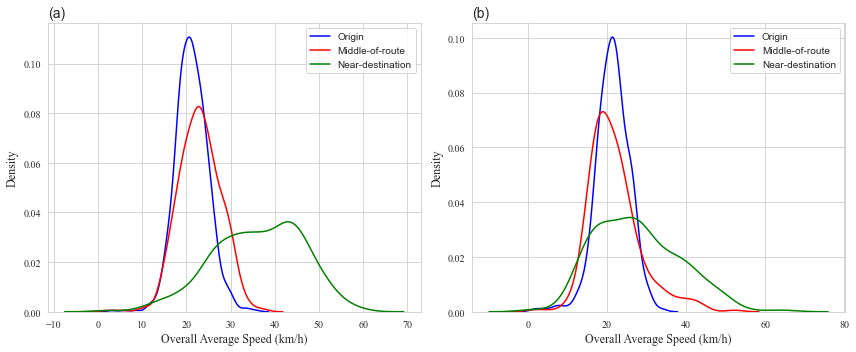

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'grid.color': '0.8'})
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


# Set the font style to Times New Roman

# Plot histograms for the first three datasets
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_O_1["Y"]), ax=axes[0], color='blue', label='Origin')
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_M_1["Y"]), ax=axes[0], color='red', label='Middle-of-route')
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_N_1["Y"]), ax=axes[0], color='green', label='Near-destination')

# Plot histograms for the last three datasets
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_O_2["Y"]), ax=axes[1], color='blue', label='Origin')
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_M_2["Y"]), ax=axes[1], color='red', label='Middle-of-route')
sns.kdeplot(data=np.array(Esfahan_Hormozgan_trains_N_2["Y"]), ax=axes[1], color='green', label='Near-destination')

# Set titles and labels for the subplots
axes[0].set_title('(a)',loc="left",fontsize = 14)
axes[0].set_xlabel('Overall Average Speed (km/h)',fontsize = 12)
axes[0].set_ylabel('Density',fontsize = 12)
axes[1].set_title('(b)',loc="left",fontsize = 14)
axes[1].set_xlabel('Overall Average Speed (km/h)',fontsize = 12)
axes[1].set_ylabel('Density',fontsize = 12)

for item in ([axes[0].title, axes[0].xaxis.label, axes[0].yaxis.label] +
             axes[0].get_xticklabels() + axes[0].get_yticklabels()+axes[0].legend().get_texts()):
    item.set_fontname('Times New Roman')
for item in ([axes[1].title, axes[1].xaxis.label, axes[1].yaxis.label] +
             axes[1].get_xticklabels() + axes[1].get_yticklabels()+axes[1].legend().get_texts()):
    item.set_fontname('Times New Roman')
# Add a legend to the first subplot
axes[0].legend()
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
#plt.savefig('kde_plot.svg', format='svg')

plt.show()


In [75]:
MAPE_MAE_Values=pd.DataFrame(columns = ["Origin_Destination", "Direction", "MAE","MAPE","ML","MAE_T","MAPE_T"])

In [76]:
MAPE_MAE_Values["Origin_Destination"]=[x for x in range(1,25)]

In [77]:
for df in list_of_the_datasets:
    globals()[df].reset_index(drop = True,inplace=True)

In [78]:
def eliminating_outliers(list_of_the_datasets):
    for df in list_of_the_datasets:
        IQR=(globals()[df]["Y"].quantile(0.75)- globals()[df]["Y"].quantile(0.25))
        Q3=globals()[df]["Y"].quantile(0.75)
        Q1=globals()[df]["Y"].quantile(0.25)
        globals()[df]=globals()[df][(globals()[df]["Y"] < ((Q3 + (1.5* IQR))))&(globals()[df]["Y"] > ((Q1 -(1.5* IQR))))]

In [79]:
eliminating_outliers(list_of_the_datasets)

In [80]:
for df in list_of_the_datasets:
    globals()[df].reset_index(drop = True,inplace=True)

In [81]:
Esfahan_Hormozgan_trains_N_1=Esfahan_Hormozgan_trains_N_1[(Esfahan_Hormozgan_trains_N_1["Train_Unique_Code"]!=7)&(Esfahan_Hormozgan_trains_N_1["Train_Unique_Code"]!=612)]
Esfahan_Hormozgan_trains_N_2=Esfahan_Hormozgan_trains_N_2[(Esfahan_Hormozgan_trains_N_2["Train_Unique_Code"]!=217)]

In [84]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgboost
from sklearn.neighbors import KNeighborsRegressor
import sklearn
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
def training_and_testing_models_on_each_dataset(list_of_the_datasets,MAPE_MAE_Values):
    count=0
    indexs=0
    for lane in list_of_the_datasets:
        
        lane_model=globals()[lane]
        count+=1

        #_______________________________________________________________________________________________
        
        # models of origin must be seperated from Midway and Near_dest models
        if (count==1)|(count==4):
            lane_model["Y"] = lane_model["Y"].apply(pd.to_numeric, downcast='float', errors='coerce')
            x= lane_model.iloc[:,14:-1]
            print(x.info())
            X = pd.get_dummies(x, drop_first=True)
            
            t=lane_model["Y"]
            y=np.array(t.to_numpy())
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=50)
            lane_model['set'] ='train'
            lane_model.loc[X_test.index, 'set'] ='test'
        elif (count==3)|(count==6):
            lane_model["Y"] = lane_model["Y"].apply(pd.to_numeric, downcast='float', errors='coerce')
            x= lane_model.iloc[:,14:-2]
            print(x.info())
            X = pd.get_dummies(x, drop_first=True)
            
            t=lane_model["Y"]
            y=np.array(t.to_numpy())
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=50)
            lane_model['set'] ='train'
            lane_model.loc[X_test.index, 'set'] ='test'
        
        else:
            lane_model["Y"] = lane_model["Y"].apply(pd.to_numeric, downcast='float', errors='coerce')
            x= lane_model.iloc[:,14:-2]
            print(x.info())
            X = pd.get_dummies(x, drop_first=True)
            
            t=lane_model["Y"]
            y=np.array(t.to_numpy())
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=50)
            
            lane_model['set'] ='train'
            lane_model.loc[X_test.index, 'set'] ='test'
        
        def mape(y_test, pred):
            y_test, pred = np.array(y_test), np.array(pred)
            mape = np.mean(np.abs((y_test - pred) / y_test))
            return mape
        
        def mse(actual, pred): 
            actual, pred = np.array(actual), np.array(pred)
            return np.square(np.subtract(actual,pred)).mean() 
        
        def mae(y_true, predictions):
            y_true, predictions = np.array(y_true), np.array(predictions)
            return np.mean(np.abs(y_true - predictions))
        
        #_______________________________________________________________________________________
        param_reg_L = {'alpha' : [0.001,0.003,0.005,0.0075,0.009,0.01,0.018,0.02,0.023,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.5,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,50,70,100,130,150,180,220] }  
        
        reg_L = linear_model.Ridge()
        grid_search_L = GridSearchCV(estimator =reg_L, param_grid = param_reg_L, scoring="neg_mean_absolute_percentage_error",
                      cv =4 , n_jobs = -1, verbose = 3,return_train_score=True)
        grid_search_L.fit(X_train,y_train)
        alpha_=grid_search_L.best_params_["alpha"]
        X_std = np.std(X_train, axis=0)
        rig=linear_model.Ridge(alpha=alpha_)
        rig.fit(X_train,y_train)
        coef_=rig.coef_
        
        coef_std = coef_ / X_std
        print(coef_std)
        plt.barh(X.columns, coef_std)
        plt.show()
        
        plt.barh(X.columns, rig.coef_)
        plt.show()
        print(f"******************MAE_train_rig:*****************:{mae(y_train, grid_search_L.predict(X_train))}")
        print(f"******************MAE_test_rig:*****************:{mae(y_test,grid_search_L.predict(X_test))}")
        
        print(f"******************MAE_train_rig_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_train.index, 'Remaining_Distance'])/y_train,np.array(lane_model.loc[X_train.index, 'Remaining_Distance']) /(grid_search_L.predict(X_train)))}")
        print(f"******************MAE_test_rig_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_L.predict(X_test)))}")
        
        plt.scatter(grid_search_L.predict(X_test), y_test , color = "blue", s = 10, label = 'Test data')
        plt.hlines(y = (min(y_test)), xmin = (min(y_test)), xmax = (max(y_test)) , linewidth = 2)
        plt.legend(loc = 'upper right')
        plt.title("COR")
        plt.show()
        
        MAPE_MAE_Values.iloc[indexs:indexs+1,2]= mape(y_test, grid_search_L.predict(X_test))
        MAPE_MAE_Values.iloc[indexs:indexs+1,3] = mae((y_test),(grid_search_L.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,5]= mape(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_L.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,6] = mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_L.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,4] ="Ridge"
        indexs=indexs+1
        #_______________________________________________________________________________________________________
        #SVR models
        param = {'C' : [0.001,0.1,25,40,100,300,350,500,800,1000,1500,1800,2300,3000,3400,3800,4000,4200,4500,4700,4900,5100,5300,5500,6000,6200,6400,6900,7200,7500,7700,8000,8200,8500,8750,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000,15000,16000],'epsilon' : [0,0.001,0.05,0.09,0.2,0.3,0.8,1,1.7,2.5,2.8,3.25,3.8,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,20,35,50,100]}
        
        svr_gs=SVR(kernel='rbf',max_iter=-1)
        grid_search = GridSearchCV(estimator = svr_gs, param_grid = param, scoring=('neg_mean_absolute_percentage_error'),
                                        cv =4 , n_jobs = -1, verbose = 3,return_train_score=True)
        grid_search.fit(X_train,y_train)
        print(grid_search.best_params_)
        print(type(grid_search.best_params_))
        
        svr_gs_=SVR(kernel='rbf',C=grid_search.best_params_["C"],epsilon=grid_search.best_params_["epsilon"],max_iter=-1)
        svr_gs_.fit(X_train,y_train)
        
        results = permutation_importance(svr_gs_, X, y, scoring="neg_mean_absolute_error")
        # get importance
        importance = results.importances_mean
        # summarize feature importance
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
        
        plt.scatter(svr_gs_.predict(X_test), y_test , color = "blue", s = 10, label = 'Test data')
        plt.hlines(y = (min(y_test)), xmin = (min(y_test)), xmax = (max(y_test)) , linewidth = 2)
        plt.legend(loc = 'upper right')
        plt.title("COR")
        plt.show()
        #__________________________________________________________________________________________
        if (count==2):
            print(grid_search.best_params_["C"])
            print(count)
        if (count==2):
            print(grid_search.best_params_["epsilon"])
            print(count)
        plt.show()
        #__________________________________________________________________________________________________________
        print(f"******************MAE_train_SVR:*****************:{mae(y_train, grid_search.predict(X_train))}")
        print(f"******************MAE_test_SVR:*****************:{mae(y_test, grid_search.predict(X_test))}")
        
        print(f"******************MAE_train_SVR_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_train.index, 'Remaining_Distance'])/y_train,np.array(lane_model.loc[X_train.index, 'Remaining_Distance']) /(grid_search.predict(X_train)))}")
        print(f"******************MAE_test_SVR_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search.predict(X_test)))}")
        
        MAPE_MAE_Values.iloc[indexs:indexs+1,2]= mape(y_test, grid_search.predict(X_test))
        MAPE_MAE_Values.iloc[indexs:indexs+1,3] = mae((y_test),(grid_search.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,5]= mape(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,6] = mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search.predict(X_test)))
        
        MAPE_MAE_Values.iloc[indexs:indexs+1,4] ="SVR"
        indexs=indexs+1
        #________________________________________________________________________________________
        param_KNN = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}

        knn_model = KNeighborsRegressor()
        grid_search_KNN = GridSearchCV(estimator = knn_model, param_grid = param_KNN, scoring="neg_mean_absolute_percentage_error",
                              cv =4 , n_jobs = -1, verbose = 3,return_train_score=True)
        grid_search_KNN.fit(X_train,y_train)

        MAPE_MAE_Values.iloc[indexs:indexs+1,2]= mape(y_test, grid_search_KNN.predict(X_test))
        MAPE_MAE_Values.iloc[indexs:indexs+1,3] = mae((y_test),(grid_search_KNN.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,5]= mape(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_KNN.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,6] = mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_KNN.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,4] ="KNN"
        indexs=indexs+1
        print(f"******************MAE_train_KNN:*****************:{mae(y_train, grid_search_KNN.predict(X_train))}")
        print(f"******************MAE_test_KNN:*****************:{mae(y_test, grid_search_KNN.predict(X_test))}")
        
        print(f"******************MAE_train_KNN_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_train.index, 'Remaining_Distance'])/y_train,np.array(lane_model.loc[X_train.index, 'Remaining_Distance']) /( grid_search_KNN.predict(X_train)))}")
        print(f"******************MAE_test_KNN_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /( grid_search_KNN.predict(X_test)))}")
        
        
        print(grid_search_KNN.best_params_)
        print(type(grid_search_KNN.best_params_))
        
        plt.scatter(grid_search_KNN.predict(X_test), y_test , color = "blue", s = 10, label = 'Test data')
        plt.hlines(y = (min(y_test)), xmin = (min(y_test)), xmax = (max(y_test)) , linewidth = 2)
        plt.legend(loc = 'upper right')
        plt.title("COR")
        plt.show()
        #_________________________________________________________________________________________________________________
        param_RF = {'n_estimators' : [70,90,100,110,120,150,170,200,230,250,300,400,500,600],'max_depth' : [2,3,4,5,6,7,8]}
        
        regressor = RandomForestRegressor(min_samples_split=3,
                min_samples_leaf=3)
        
        grid_search_RF = GridSearchCV(estimator = regressor, param_grid = param_RF, scoring="neg_mean_absolute_percentage_error",
                      cv =4 , n_jobs = -1, verbose = 3,return_train_score=True)
        grid_search_RF.fit(X_train,y_train)
        
        MAPE_MAE_Values.iloc[indexs:indexs+1,2]= mape(y_test, grid_search_RF.predict(X_test))
        MAPE_MAE_Values.iloc[indexs:indexs+1,3] = mae((y_test),(grid_search_RF.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,5]= mape(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_RF.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,6] = mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /(grid_search_RF.predict(X_test)))
        MAPE_MAE_Values.iloc[indexs:indexs+1,4] ="RF"
        indexs=indexs+1
        print(f"******************MAE_train_RF:*****************:{mae(y_train, grid_search_RF.predict(X_train))}")
        print(f"******************MAE_test_RF:*****************:{mae(y_test, grid_search_RF.predict(X_test))}")
        
        print(f"******************MAE_train_RF_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_train.index, 'Remaining_Distance'])/y_train,np.array(lane_model.loc[X_train.index, 'Remaining_Distance']) /( grid_search_RF.predict(X_train)))}")
        print(f"******************MAE_test_RF_Transit_Time:*****************:{mae(np.array(lane_model.loc[X_test.index, 'Remaining_Distance'])/y_test,np.array(lane_model.loc[X_test.index, 'Remaining_Distance']) /( grid_search_RF.predict(X_test)))}")
        
        RF_ = RandomForestRegressor(n_estimators=grid_search_RF.best_params_["n_estimators"],max_depth=grid_search_RF.best_params_["max_depth"],min_samples_split=3,
                min_samples_leaf=3)
        RF_.fit(X_train, y_train)
        print(RF_.feature_importances_)
        plt.barh(X.columns, RF_.feature_importances_)
        plt.show()
        
        print(grid_search_RF.best_params_)
        print(type(grid_search_RF.best_params_))
        
        plt.scatter(RF_.predict(X_test), y_test , color = "blue", s = 10, label = 'Test data')
        plt.hlines(y = (min(y_test)), xmin = (min(y_test)), xmax = (max(y_test)) , linewidth = 2)
        plt.legend(loc = 'upper right')
        plt.title("COR")
        plt.show()
        #______________________________________________________________________________________________
        if (count==1):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Origin"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D1"
        elif (count==2):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Middle-of-route"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D1"
        elif (count==3):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Near-destinatoin"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D1"
        elif (count==4):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Origin"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D2"
        elif (count==5):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Middle-of-route"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D2"
        elif (count==6):
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,0]="Near-destinatoin"
            MAPE_MAE_Values.iloc[indexs-4:indexs+1,1]="D2" 

C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\4251585248.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lane_model["Y"] = lane_model["Y"].apply(pd.to_numeric, downcast='float', errors='coerce')
C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\amirhosein\AppData\Local\Temp\ipykernel_10360\4251585248.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Dwell_Time                        781 non-null    float64
 1   Remaining_Distance                781 non-null    float64
 2   Double_Tracks_Remaining_Distance  781 non-null    float64
 3   AVE_Slope_of_Route                781 non-null    float64
 4   AVE_E_C_of_Route                  781 non-null    float64
 5   Remaining_Stations                781 non-null    int64  
 6   Month                             781 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits
Dwell_Time                           0.371892
Remaining_Distance                   0.000083
Double_Tracks_Remaining_Distance    -0.000044
AVE_Slope_of_Route                   1.057675
AVE_E_C_of_Rout

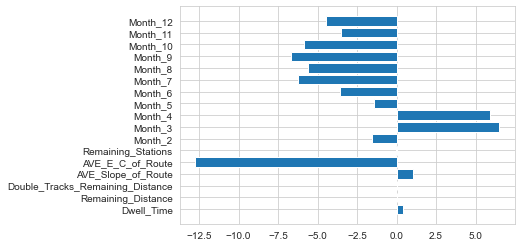

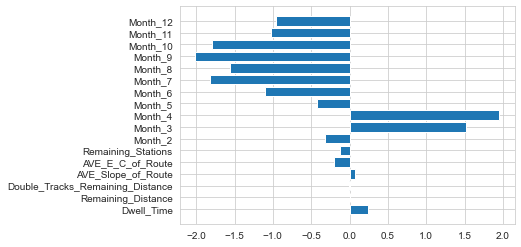

******************MAE_train_rig:*****************:2.460508491065891
******************MAE_test_rig:*****************:2.4456798838229417
******************MAE_train_rig_Transit_Time:*****************:4.462876507573949
******************MAE_test_rig_Transit_Time:*****************:4.275405032977607


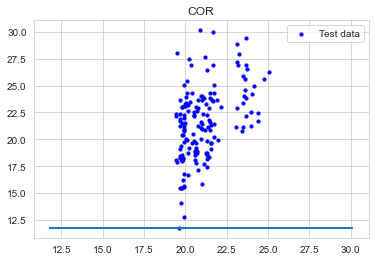

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 16000, 'epsilon': 1}
<class 'dict'>
Feature: 0, Score: 0.01368
Feature: 1, Score: 1.90301
Feature: 2, Score: 1.51379
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04961
Feature: 6, Score: -0.00036
Feature: 7, Score: 0.01276
Feature: 8, Score: 0.07869
Feature: 9, Score: 0.00189
Feature: 10, Score: 0.00175
Feature: 11, Score: 0.00696
Feature: 12, Score: 0.00337
Feature: 13, Score: 0.02265
Feature: 14, Score: 0.01998
Feature: 15, Score: 0.00013
Feature: 16, Score: -0.00169


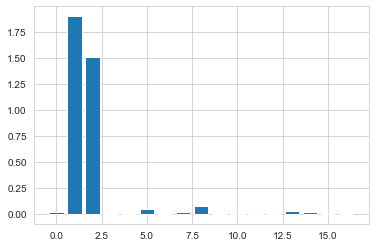

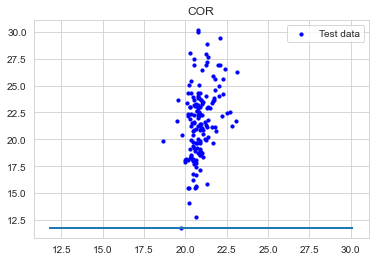

******************MAE_train_SVR:*****************:2.524123513451101
******************MAE_test_SVR:*****************:2.58655273367349
******************MAE_train_SVR_Transit_Time:*****************:4.557759270730661
******************MAE_test_SVR_Transit_Time:*****************:4.506488556228732
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:2.6045436324337707
******************MAE_test_KNN:*****************:2.5608455336700673
******************MAE_train_KNN_Transit_Time:*****************:4.703362148568874
******************MAE_test_KNN_Transit_Time:*****************:4.480337734184038
{'n_neighbors': 23}
<class 'dict'>


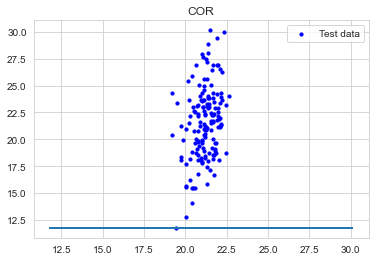

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:2.496548956042741
******************MAE_test_RF:*****************:2.5493301319574333
******************MAE_train_RF_Transit_Time:*****************:4.537882940374193
******************MAE_test_RF_Transit_Time:*****************:4.452650778692873
[0.01737404 0.05771447 0.         0.0085049  0.03513172 0.0125768
 0.         0.22894505 0.63450283 0.         0.         0.00167563
 0.         0.         0.00357457 0.         0.        ]


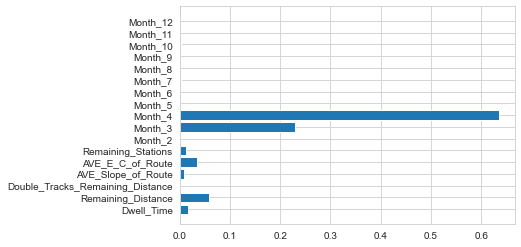

{'max_depth': 2, 'n_estimators': 90}
<class 'dict'>


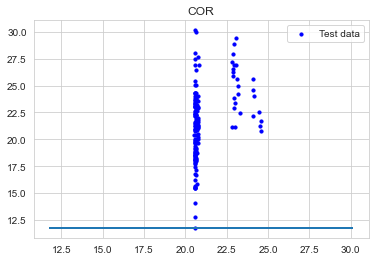

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AVE_Speed                         785 non-null    float64
 1   Remaining_Distance                785 non-null    float64
 2   Double_Tracks_Remaining_Distance  785 non-null    float64
 3   AVE_Dwell_Time                    785 non-null    float64
 4   Big_Dwell_Time                    785 non-null    float64
 5   AVE_Slope_of_Route                785 non-null    float64
 6   AVE_E_C_of_Route                  785 non-null    float64
 7   Month                             785 non-null    object 
 8   Traveled_Distance                 785 non-null    float64
 9   Remaining_Stations                785 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 61.5+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


AVE_Speed                            -0.000195
Remaining_Distance                    0.008890
Double_Tracks_Remaining_Distance      0.000387
AVE_Dwell_Time                        3.836515
Big_Dwell_Time                       -0.107865
AVE_Slope_of_Route                   28.639805
AVE_E_C_of_Route                    209.837135
Traveled_Distance                     0.000068
Remaining_Stations                   -0.333521
Month_2                              -2.263580
Month_3                               3.586371
Month_4                               3.957605
Month_5                              -2.946000
Month_6                              -2.214634
Month_7                              -5.836076
Month_8                              -1.612480
Month_9                              -3.739982
Month_10                             -1.151962
Month_11                             -3.347416
Month_12                             -3.186948
dtype: float64


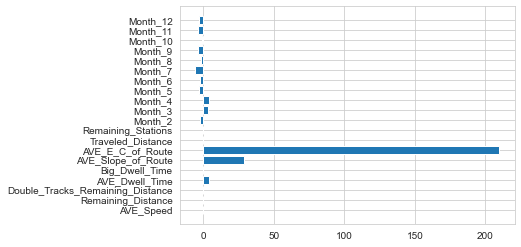

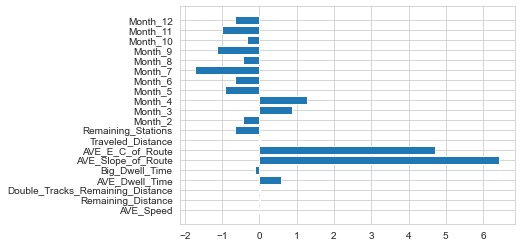

******************MAE_train_rig:*****************:3.374720570652813
******************MAE_test_rig:*****************:3.155117825587484
******************MAE_train_rig_Transit_Time:*****************:2.6197561823125266
******************MAE_test_rig_Transit_Time:*****************:2.289583598686036


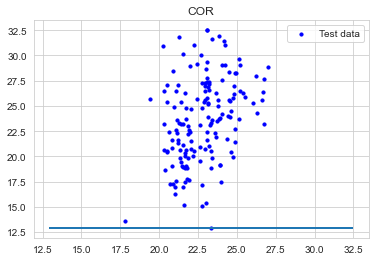

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 300, 'epsilon': 0.2}
<class 'dict'>
Feature: 0, Score: 0.00581
Feature: 1, Score: 0.00128
Feature: 2, Score: 0.27272
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00076
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.19769
Feature: 8, Score: 0.00037
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00035
Feature: 11, Score: 0.00178
Feature: 12, Score: 0.00025
Feature: 13, Score: 0.00030
Feature: 14, Score: 0.00081
Feature: 15, Score: 0.00004
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.00005


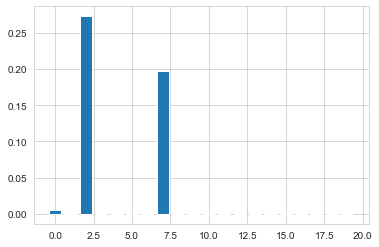

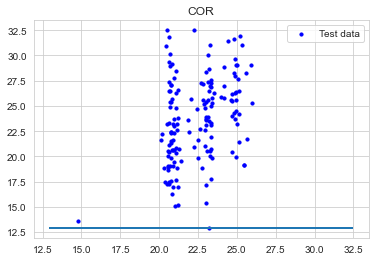

300
2
0.2
2
******************MAE_train_SVR:*****************:3.3620024084027462
******************MAE_test_SVR:*****************:3.2348047332000998
******************MAE_train_SVR_Transit_Time:*****************:2.6056825641966235
******************MAE_test_SVR_Transit_Time:*****************:2.3323166293560944
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:3.3104643100463673
******************MAE_test_KNN:*****************:3.249101205989478
******************MAE_train_KNN_Transit_Time:*****************:2.5744794867029954
******************MAE_test_KNN_Transit_Time:*****************:2.36450026296708
{'n_neighbors': 25}
<class 'dict'>


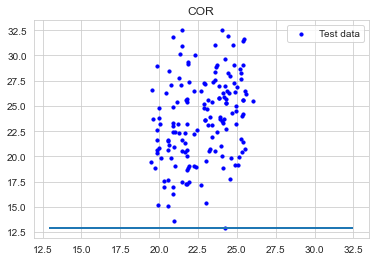

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:3.298060173919563
******************MAE_test_RF:*****************:3.26318597134179
******************MAE_train_RF_Transit_Time:*****************:2.5626691000737103
******************MAE_test_RF_Transit_Time:*****************:2.374143267439321
[0.01661073 0.00206115 0.05282795 0.03809013 0.02400921 0.00912164
 0.08872267 0.6627109  0.00630252 0.         0.03089203 0.0540283
 0.00096861 0.00096277 0.01133401 0.         0.00135738 0.
 0.         0.        ]


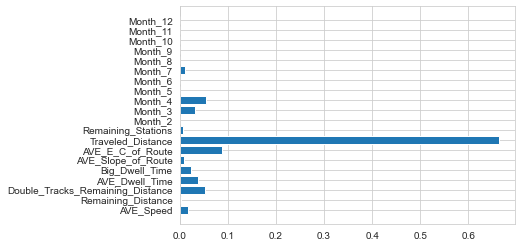

{'max_depth': 2, 'n_estimators': 100}
<class 'dict'>


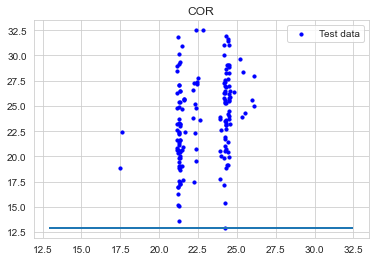

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 788
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AVE_Speed                         788 non-null    float64
 1   Remaining_Distance                788 non-null    float64
 2   Double_Tracks_Remaining_Distance  788 non-null    float64
 3   AVE_Dwell_Time                    788 non-null    float64
 4   Big_Dwell_Time                    788 non-null    float64
 5   AVE_Slope_of_Route                788 non-null    float64
 6   AVE_E_C_of_Route                  788 non-null    float64
 7   Month                             788 non-null    object 
 8   Traveled_Distance                 788 non-null    float64
 9   Remaining_Stations                788 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 67.7+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


AVE_Speed                            0.045623
Remaining_Distance                  -0.893998
Double_Tracks_Remaining_Distance     0.226154
AVE_Dwell_Time                     -16.803974
Big_Dwell_Time                       0.654357
AVE_Slope_of_Route                  70.239771
AVE_E_C_of_Route                    45.294481
Traveled_Distance                    0.000129
Remaining_Stations                  -0.789584
Month_2                              3.553056
Month_3                              5.361559
Month_4                              3.604675
Month_5                              1.078601
Month_6                              5.029147
Month_7                              1.150964
Month_8                              0.077394
Month_9                             -0.070209
Month_10                            -0.296088
Month_11                            -0.834796
Month_12                            -6.246918
dtype: float64


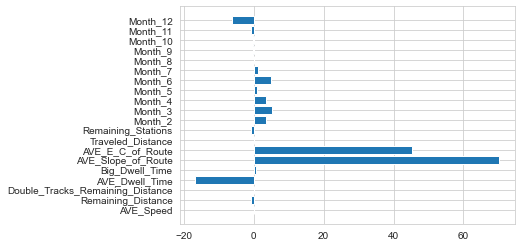

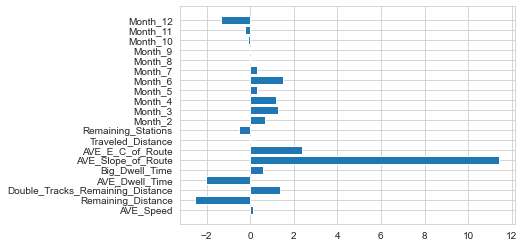

******************MAE_train_rig:*****************:6.421369883329453
******************MAE_test_rig:*****************:6.98666258627265
******************MAE_train_rig_Transit_Time:*****************:0.5734379805349665
******************MAE_test_rig_Transit_Time:*****************:0.6790687710736252


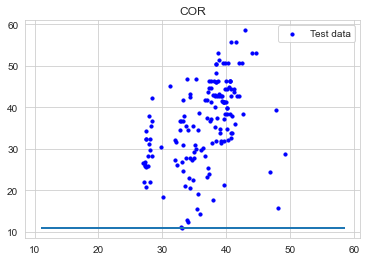

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 16000, 'epsilon': 4.75}
<class 'dict'>
Feature: 0, Score: 0.04432
Feature: 1, Score: 3.64275
Feature: 2, Score: 3.54640
Feature: 3, Score: 0.00092
Feature: 4, Score: 0.01404
Feature: 5, Score: 0.00170
Feature: 6, Score: 0.00007
Feature: 7, Score: 0.56289
Feature: 8, Score: 0.01731
Feature: 9, Score: 0.00043
Feature: 10, Score: 0.00090
Feature: 11, Score: 0.00284
Feature: 12, Score: -0.00014
Feature: 13, Score: 0.00320
Feature: 14, Score: 0.00088
Feature: 15, Score: 0.00123
Feature: 16, Score: 0.00036
Feature: 17, Score: 0.00035
Feature: 18, Score: 0.00126
Feature: 19, Score: 0.00095


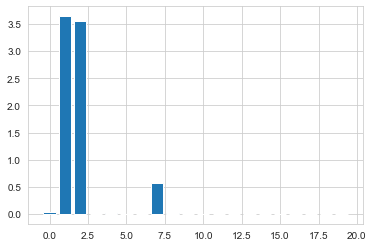

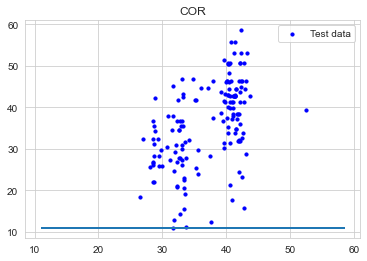

******************MAE_train_SVR:*****************:6.263295349704328
******************MAE_test_SVR:*****************:6.777424126347571
******************MAE_train_SVR_Transit_Time:*****************:0.5650119674251316
******************MAE_test_SVR_Transit_Time:*****************:0.6659545377831133
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:5.395738004462444
******************MAE_test_KNN:*****************:7.124228927554147
******************MAE_train_KNN_Transit_Time:*****************:0.5066485571437706
******************MAE_test_KNN_Transit_Time:*****************:0.6949145163411531
{'n_neighbors': 8}
<class 'dict'>


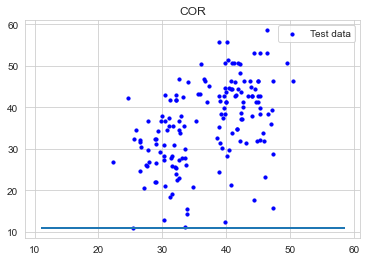

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:4.134556599137564
******************MAE_test_RF:*****************:6.465195906919921
******************MAE_train_RF_Transit_Time:*****************:0.4011364879354296
******************MAE_test_RF_Transit_Time:*****************:0.6396772286907937
[0.10270763 0.02617629 0.02572835 0.0904065  0.07904021 0.02441342
 0.51808079 0.0627571  0.01890352 0.00059358 0.00300621 0.00332912
 0.00355337 0.00300473 0.01032002 0.00554351 0.00179965 0.00822544
 0.00470192 0.00770862]


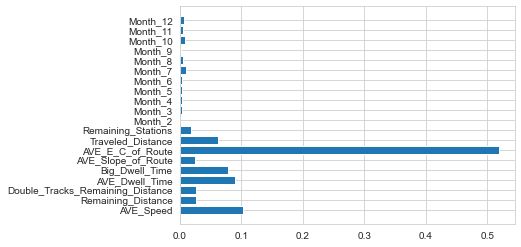

{'max_depth': 8, 'n_estimators': 170}
<class 'dict'>


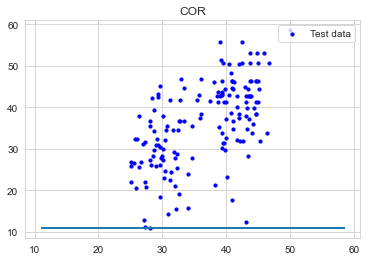

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Dwell_Time                        336 non-null    float64
 1   Remaining_Distance                336 non-null    float64
 2   Double_Tracks_Remaining_Distance  336 non-null    float64
 3   AVE_Slope_of_Route                336 non-null    float64
 4   AVE_E_C_of_Route                  336 non-null    float64
 5   Remaining_Stations                336 non-null    int64  
 6   Month                             336 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 18.5+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Dwell_Time                          0.966397
Remaining_Distance                  0.000127
Double_Tracks_Remaining_Distance   -0.000011
AVE_Slope_of_Route                 -1.723130
AVE_E_C_of_Route                   -0.240270
Remaining_Stations                 -0.067031
Month_2                             2.441332
Month_3                             8.693250
Month_4                             5.518845
Month_5                             0.882054
Month_6                            -2.118785
Month_7                            -4.612440
Month_8                            -5.106622
Month_9                            -1.715532
Month_10                           -1.010845
Month_11                           -1.360313
Month_12                            3.452650
dtype: float64


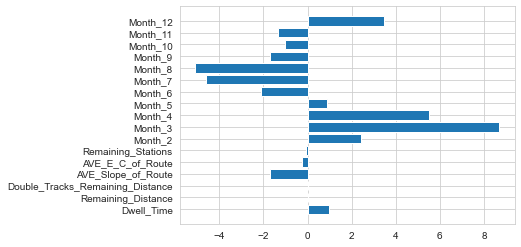

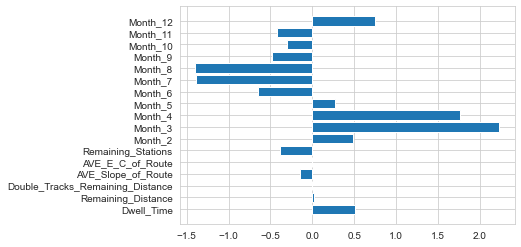

******************MAE_train_rig:*****************:2.6583321411238554
******************MAE_test_rig:*****************:2.4843754567520007
******************MAE_train_rig_Transit_Time:*****************:4.841409964263191
******************MAE_test_rig_Transit_Time:*****************:4.416098855103265


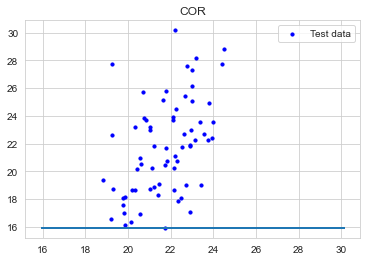

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 16000, 'epsilon': 0.3}
<class 'dict'>
Feature: 0, Score: 0.00577
Feature: 1, Score: 2.92808
Feature: 2, Score: 1.18356
Feature: 3, Score: 0.00005
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.61335
Feature: 6, Score: -0.00002
Feature: 7, Score: 0.02799
Feature: 8, Score: 0.02044
Feature: 9, Score: 0.00056
Feature: 10, Score: 0.00264
Feature: 11, Score: 0.01434
Feature: 12, Score: 0.01325
Feature: 13, Score: 0.00038
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00045
Feature: 16, Score: 0.00321


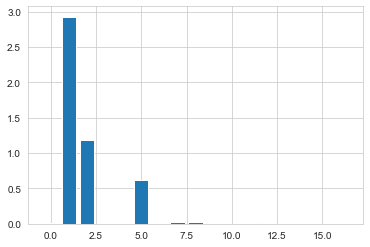

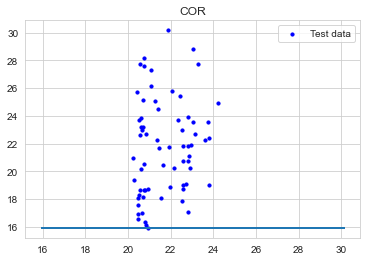

******************MAE_train_SVR:*****************:2.76541137549907
******************MAE_test_SVR:*****************:2.862602751405885
******************MAE_train_SVR_Transit_Time:*****************:5.02159391157189
******************MAE_test_SVR_Transit_Time:*****************:5.088429740772391
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:2.6366559573214152
******************MAE_test_KNN:*****************:2.9564464283756853
******************MAE_train_KNN_Transit_Time:*****************:4.800048407420432
******************MAE_test_KNN_Transit_Time:*****************:5.224131857856213
{'n_neighbors': 9}
<class 'dict'>


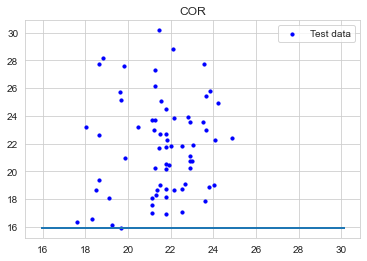

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:2.1981710411744655
******************MAE_test_RF:*****************:2.73316283650834
******************MAE_train_RF_Transit_Time:*****************:4.041331477136423
******************MAE_test_RF_Transit_Time:*****************:4.81397299316825
[0.02772336 0.1349577  0.05056712 0.17744216 0.1344165  0.0847569
 0.00456536 0.11455138 0.08615858 0.02759529 0.03573737 0.02341749
 0.02932939 0.016884   0.02033766 0.01756365 0.01399608]


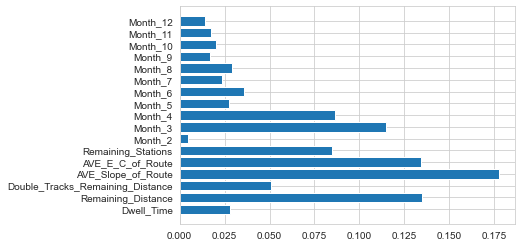

{'max_depth': 8, 'n_estimators': 300}
<class 'dict'>


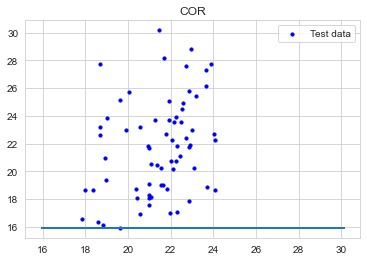

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AVE_Speed                         325 non-null    float64
 1   Remaining_Distance                325 non-null    float64
 2   Double_Tracks_Remaining_Distance  325 non-null    float64
 3   AVE_Dwell_Time                    325 non-null    float64
 4   Big_Dwell_Time                    325 non-null    float64
 5   AVE_Slope_of_Route                325 non-null    float64
 6   AVE_E_C_of_Route                  325 non-null    float64
 7   Month                             325 non-null    object 
 8   Traveled_Distance                 325 non-null    float64
 9   Remaining_Stations                325 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 25.5+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


AVE_Speed                          -0.014283
Remaining_Distance                 -0.015535
Double_Tracks_Remaining_Distance   -0.000278
AVE_Dwell_Time                     -3.546437
Big_Dwell_Time                      0.070247
AVE_Slope_of_Route                 -5.500469
AVE_E_C_of_Route                   -7.228597
Traveled_Distance                  -0.000012
Remaining_Stations                 -0.486039
Month_2                            -1.489632
Month_3                             8.443564
Month_4                             4.073546
Month_5                            -1.667310
Month_6                            -0.091634
Month_7                            -3.967063
Month_8                            -7.100193
Month_9                             1.854534
Month_10                           -3.529901
Month_11                           -0.815802
Month_12                            4.207405
dtype: float64


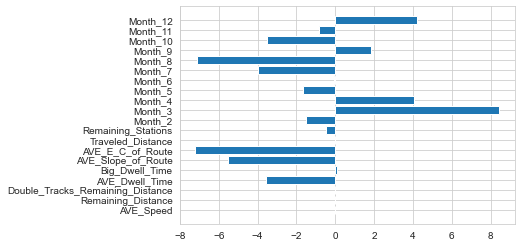

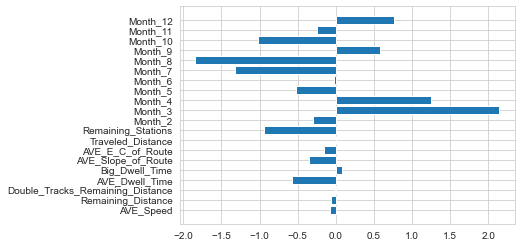

******************MAE_train_rig:*****************:3.3334968575693322
******************MAE_test_rig:*****************:3.2238546987445558
******************MAE_train_rig_Transit_Time:*****************:3.059661646504157
******************MAE_test_rig_Transit_Time:*****************:2.9163711548681084


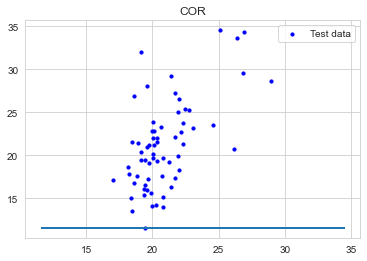

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 16000, 'epsilon': 0.8}
<class 'dict'>
Feature: 0, Score: 0.08480
Feature: 1, Score: 0.09030
Feature: 2, Score: 0.35717
Feature: 3, Score: 0.00603
Feature: 4, Score: -0.00085
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.32144
Feature: 8, Score: 0.54367
Feature: 9, Score: 0.00173
Feature: 10, Score: 0.04205
Feature: 11, Score: 0.02294
Feature: 12, Score: 0.00122
Feature: 13, Score: 0.00749
Feature: 14, Score: 0.03081
Feature: 15, Score: 0.02813
Feature: 16, Score: 0.00731
Feature: 17, Score: 0.01030
Feature: 18, Score: -0.00062
Feature: 19, Score: 0.00020


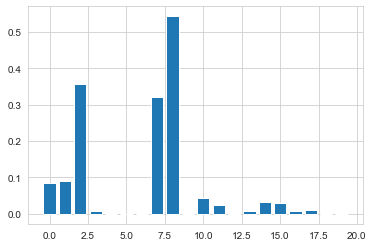

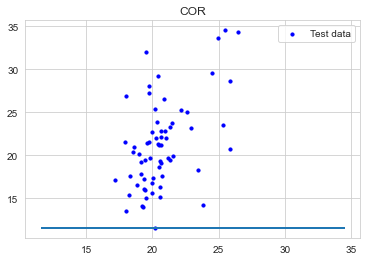

******************MAE_train_SVR:*****************:3.2345991927997666
******************MAE_test_SVR:*****************:3.5101496059884734
******************MAE_train_SVR_Transit_Time:*****************:2.9500612778003843
******************MAE_test_SVR_Transit_Time:*****************:3.1247057524893016
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:3.462818220955549
******************MAE_test_KNN:*****************:4.0873193301323765
******************MAE_train_KNN_Transit_Time:*****************:3.15727039147608
******************MAE_test_KNN_Transit_Time:*****************:3.6634341039852822
{'n_neighbors': 10}
<class 'dict'>


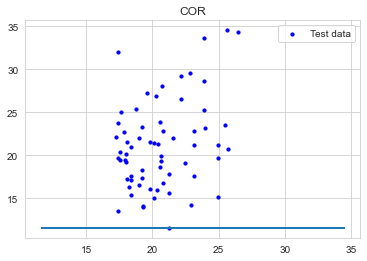

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:3.4413320531783906
******************MAE_test_RF:*****************:3.7392728899909358
******************MAE_train_RF_Transit_Time:*****************:3.1668811780760406
******************MAE_test_RF_Transit_Time:*****************:3.3478611292128004
[0.02128064 0.03129093 0.04426311 0.06857764 0.02295529 0.37805733
 0.19582256 0.02083754 0.19434286 0.         0.00407509 0.00439647
 0.         0.         0.00400507 0.002382   0.00411736 0.
 0.         0.0035961 ]


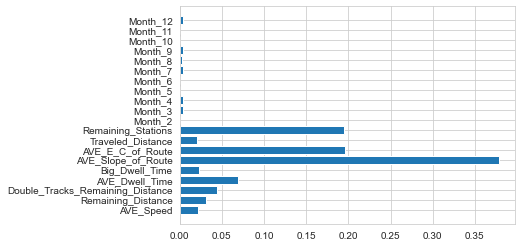

{'max_depth': 2, 'n_estimators': 90}
<class 'dict'>


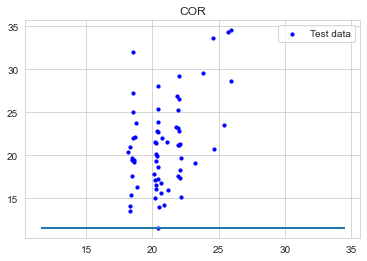

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 340
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AVE_Speed                         340 non-null    float64
 1   Remaining_Distance                340 non-null    float64
 2   Double_Tracks_Remaining_Distance  340 non-null    float64
 3   AVE_Dwell_Time                    340 non-null    float64
 4   Big_Dwell_Time                    340 non-null    float64
 5   AVE_Slope_of_Route                340 non-null    float64
 6   AVE_E_C_of_Route                  340 non-null    float64
 7   Month                             340 non-null    object 
 8   Traveled_Distance                 340 non-null    float64
 9   Remaining_Stations                340 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 29.2+ KB
None
Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\amirhosein\.conda\envs\TTT\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


AVE_Speed                            -0.037136
Remaining_Distance                    0.119266
Double_Tracks_Remaining_Distance           NaN
AVE_Dwell_Time                      -38.127936
Big_Dwell_Time                        0.365494
AVE_Slope_of_Route                  -82.613316
AVE_E_C_of_Route                    128.236687
Traveled_Distance                    -0.000048
Remaining_Stations                   -2.136654
Month_2                               0.323366
Month_3                              13.704675
Month_4                              -2.371919
Month_5                              -5.668626
Month_6                              -3.769850
Month_7                              -2.109231
Month_8                              -6.251450
Month_9                               0.857588
Month_10                             -7.513263
Month_11                             -2.268100
Month_12                              4.312267
dtype: float64


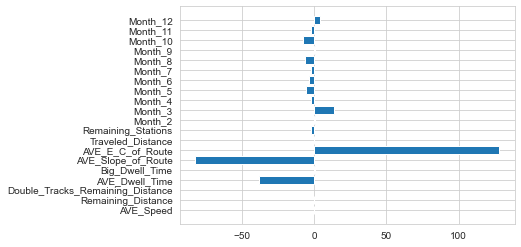

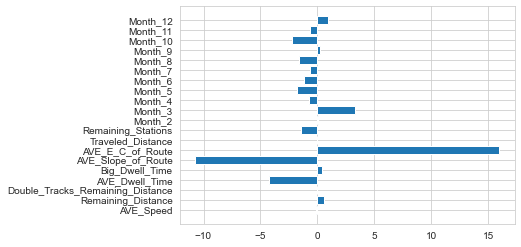

******************MAE_train_rig:*****************:6.603759491436952
******************MAE_test_rig:*****************:6.89638548875386
******************MAE_train_rig_Transit_Time:*****************:2.2408473982575656
******************MAE_test_rig_Transit_Time:*****************:1.1287673469571133


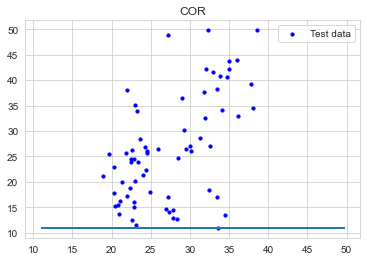

Fitting 4 folds for each of 1584 candidates, totalling 6336 fits
{'C': 0.001, 'epsilon': 4.5}
<class 'dict'>
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00032
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000


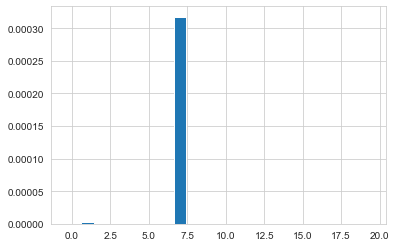

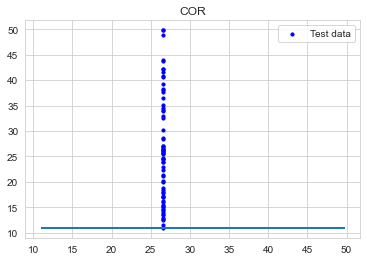

******************MAE_train_SVR:*****************:8.409557773547299
******************MAE_test_SVR:*****************:8.616713878578798
******************MAE_train_SVR_Transit_Time:*****************:2.4565870313315314
******************MAE_test_SVR_Transit_Time:*****************:1.33246947714569
Fitting 4 folds for each of 24 candidates, totalling 96 fits
******************MAE_train_KNN:*****************:7.141875694750865
******************MAE_test_KNN:*****************:7.306554530156271
******************MAE_train_KNN_Transit_Time:*****************:2.304300844112465
******************MAE_test_KNN_Transit_Time:*****************:1.1972424106640558
{'n_neighbors': 16}
<class 'dict'>


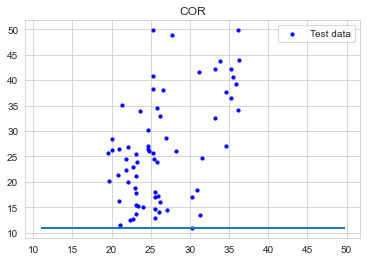

Fitting 4 folds for each of 98 candidates, totalling 392 fits
******************MAE_train_RF:*****************:5.056257759209938
******************MAE_test_RF:*****************:6.42229591966163
******************MAE_train_RF_Transit_Time:*****************:2.0630215523987507
******************MAE_test_RF_Transit_Time:*****************:1.0944402035487188
[9.85742961e-02 1.29346400e-02 0.00000000e+00 7.67105183e-02
 6.29338316e-02 2.94931327e-02 6.11458996e-01 2.95986115e-02
 9.17195044e-03 9.07715662e-04 1.54092034e-02 4.36275850e-03
 2.02890356e-02 1.81593605e-03 2.80395450e-03 5.19626733e-04
 2.38730667e-03 3.22106621e-03 2.38784894e-03 1.50195712e-02]


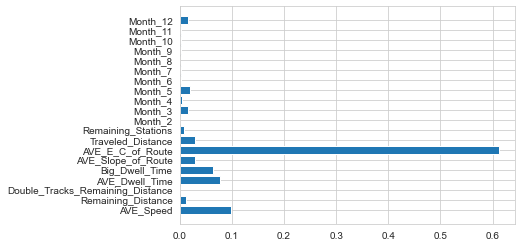

{'max_depth': 5, 'n_estimators': 70}
<class 'dict'>


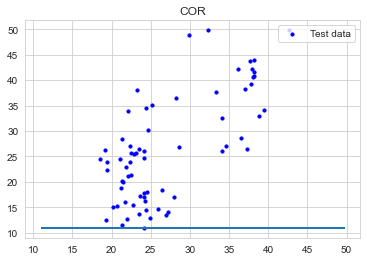

In [85]:
training_and_testing_models_on_each_dataset(list_of_the_datasets,MAPE_MAE_Values)

In [86]:
MAPE_MAE_Values

,Origin_Destination,Direction,MAE,MAPE,ML,MAE_T,MAPE_T
0,Origin,D1,0.116073,2.44568,Ridge,0.11728,4.275405
1,Origin,D1,0.122082,2.586553,SVR,0.124182,4.506489
2,Origin,D1,0.122143,2.560846,KNN,0.121511,4.480338
3,Origin,D1,0.121389,2.54933,RF,0.121493,4.452651
4,Middle-of-route,D1,0.135929,3.155118,Ridge,0.140131,2.289584
5,Middle-of-route,D1,0.136853,3.234805,SVR,0.145558,2.332317
6,Middle-of-route,D1,0.140618,3.249101,KNN,0.144304,2.3645
7,Middle-of-route,D1,0.141657,3.263186,RF,0.144415,2.374143
8,Near-destinatoin,D1,0.256163,6.986663,Ridge,0.190939,0.679069
9,Near-destinatoin,D1,0.250046,6.777424,SVR,0.18487,0.665955
